# PHASE 4 PROJECT


Group 3 collaborators:

Students Names:
* Catherine Gakii
* Bryson Shitsukane
* Brenda Kinya
* Nazra Nyangwara
* Robin Mutai
* Tobias Ng'ong'a
* Jonathan Okwaro - Team Lead

# **ZILLOW TIME SERIES ANALYSIS PROJECT**

![Local Cat](housing_image5.avif)

# **1.0 Business Understanding**

## **1.1 Problem statement**

* Boma Yangu real estate investment firm is seeking to make strategic real estate investments in specific geographic areas in the US. Their aim is to maximize returns on their investments by identifying regions with high growth potential, favorable market conditions, and strong demand for real estate properties. They have contracted our services to analyze relevant data and provide a recommendation on the top 5 best zip codes to invest in.


## **1.2 Objectives**
* To provide a recommendation for the top 5 best zip codes to invest in
* To develop a model that can accurately forecast expected returns from the property market over time

## **1.3 Metrics of Success**
    
#### What defines our top best performing zipcodes?

- Return On Investment: We will use Return On Investment ratio to measure 'best'.


- The metrics we will be optimizing against/minimizing are the AIC and RMSE. The lower the AIC and RMSE, the better our model will be at forecasting.

# **2.0 Data Understanding**

* This dataset was obtained from Zillow Research. It contains real estate property values from April 1996 to April 2018 for various Zipcodes. The columns include:

    * RegionID: An identifier for the region.
    * RegionName: The zip code.
    * City: The city where the zip code is located.
    * State: The state where the zip code is located.
    * Metro: The metropolitan area related to the zip code.
    * CountyName: The county where the zip code is located.
    * SizeRank: A ranking based on the size or importance of the zip code.
    * Monthly Data (e.g., 1996-04, 1996-05, ...): These columns represent the median real estate prices for a given zip code for each month from April 1996 to April 2018.

In [1]:
! pip install pmdarima

# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import seaborn as sns
from math import sqrt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import acf, pacf
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('zillow_data.csv')

# Preview the first 5 rows
data.head(5)

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [3]:
# View the last 5 rows
data.tail(5)

RegionID  RegionName                 City State            Metro  \
14718     58333        1338             Ashfield    MA  Greenfield Town   
14719     59107        3293            Woodstock    NH        Claremont   
14720     75672       40404                Berea    KY         Richmond   
14721     93733       81225  Mount Crested Butte    CO              NaN   
14722     95851       89155             Mesquite    NV        Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[5 rows x 272 columns]

In [4]:
# Check the shape
data.shape

(14723, 272)

In [5]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# Check descriptive statistics
data.describe()

RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  8.646795e+04  8.665094e+04  8.687208e+04  8.715185e+04   
min    1.160000e+04  1.180000e+04  1.180000e+04  1.200000e+04  1.210000e+04   
25%    6.910000e+04  6.920000e+04  6.937500e+04  6.950000e+04  6.960000e+04   
50%    9.970000e+04  9.970000e+04  9.980000e+04  9.990000e+04  9.995000e+04   
75%    1.432250e+05  1.432250e+05  1.435000e+05  1.437000e+05  1.439000e+05   
max    3.729600e+06  3.754600e+06  3.781800e+06  3.813500e+06  3.849600e+06   

       ...       2017-07       2017-08       2017-09       2017-10  \
count  ...  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   ...  2.733354e+05  2.748658e+05  2.764646e+05  2.780332e+05   
std    ...  3.603984e+05  3.614678e+05  3.627563e+05  3.644610e+05   
min    ...  1.440000e+04  1.450000e+04  1.470000e+04  1.480000e+04   
25%    ...  1.269000e+05  1.275000e+05  1.282000e+05  1.287000e+05   
50%    ...  1.884000e+05  1.896000e+05  1.905000e+05  1.914000e+05   
75%    ...  3.050000e+05  3.066500e+05  3.085000e+05  3.098000e+05   
max    ...  1.888990e+07  1.870350e+07  1.860530e+07  1.856940e+07   

            2017-11       2017-12       2018-01       2018-02       2018-03  \
count  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04  1.472300e+04   
mean   2.795209e+05  2.810953e+05  2.826571e+05  2.843687e+05  2.865114e+05   
std    3.656003e+05  3.670454e+05  3.695727e+05  3.717739e+05  3.724612e+05   
min    1.450000e+04  1.430000e+04  1.410000e+04  1.390000e+04  1.380000e+04   
25%    1.292500e+05  1.299000e+05  1.306000e+05  1.310500e+05  1.319500e+05   
50%    1.925000e+05  1.934000e+05  1.941000e+05  1.950000e+05  1.967000e+05   
75%    3.117000e+05  3.134000e+05  3.151000e+05  3.168500e+05  3.188500e+05   
max    1.842880e+07  1.830710e+07  1.836590e+07  1.853040e+07  1.833770e+07   

            2018-04  
count  1.472300e+04  
mean   2.880399e+05  
std    3.720544e+05  
min    1.380000e+04  
25%    1.324000e+05  
50%    1.981000e+05  
75%    3.211000e+05  
max    1.789490e+07  

[8 rows x 268 columns]

In [7]:
# Check for missing values
data.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [8]:
# Checking how many unique values we have on each column, besides the time data
data.iloc[:,0:7].nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
dtype: int64

* Observations:

  * The dataset contains 14722 rows and 272 colums
  * Some columns in the dataset contain missing values
  * Data has both continuous and categorical features comprising of the following data types; objects, integers, floats
  * The dataset is in wide format with the time periods appearing as columns. We will need to convert it into long format

# **3.0 Data preparation**

## **3.1 Data cleaning**

In [9]:
# Drop unnecessary columns
data = data.drop(columns = ['Metro','CountyName'], axis=1)
data

RegionID  RegionName                 City State  SizeRank   1996-04  \
0         84654       60657              Chicago    IL         1  334200.0   
1         90668       75070             McKinney    TX         2  235700.0   
2         91982       77494                 Katy    TX         3  210400.0   
3         84616       60614              Chicago    IL         4  498100.0   
4         93144       79936              El Paso    TX         5   77300.0   
...         ...         ...                  ...   ...       ...       ...   
14718     58333        1338             Ashfield    MA     14719   94600.0   
14719     59107        3293            Woodstock    NH     14720   92700.0   
14720     75672       40404                Berea    KY     14721   57100.0   
14721     93733       81225  Mount Crested Butte    CO     14722  191100.0   
14722     95851       89155             Mesquite    NV     14723  176400.0   

        1996-05   1996-06   1996-07   1996-08  ...  2017-07  2017-08  2017-09  \
0      335400.0  336500.0  337600.0  338500.0  ...  1005500  1007500  1007800   
1      236900.0  236700.0  235400.0  233300.0  ...   308000   310000   312500   
2      212200.0  212200.0  210700.0  208300.0  ...   321000   320600   320200   
3      500900.0  503100.0  504600.0  505500.0  ...  1289800  1287700  1287400   
4       77300.0   77300.0   77300.0   77400.0  ...   119100   119400   120000   
...         ...       ...       ...       ...  ...      ...      ...      ...   
14718   94300.0   94000.0   93700.0   93400.0  ...   216800   217700   218600   
14719   92500.0   92400.0   92200.0   92100.0  ...   202100   208400   212200   
14720   57300.0   57500.0   57700.0   58000.0  ...   121800   122800   124600   
14721  192400.0  193700.0  195000.0  196300.0  ...   662800   671200   682400   
14722  176300.0  176100.0  176000.0  175900.0  ...   333800   336400   339700   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0      1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1       314100   315000   316600   318100   319600   321100   321800  
2       320400   320800   321200   321200   323000   326900   329900  
3      1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4       120300   120300   120300   120300   120500   121000   121500  
...        ...      ...      ...      ...      ...      ...      ...  
14718   218500   218100   216400   213100   209800   209200   209300  
14719   215200   214300   213100   213700   218300   222700   225800  
14720   126700   128800   130600   131700   132500   133000   133400  
14721   695600   695500   694700   706400   705300   681500   664400  
14722   343800   346800   348900   350400   353000   356000   357200  

[14723 rows x 270 columns]

## **3.2 Data Preprocessing**

* To make informed investment decisions, we will enrich our dataset by calculating a few key metrics that provide insights into the historical performance and variability of housing prices for each zip code. Here is the breakdown of the metrics we will use:

    1. Historical Return on Investment (ROI):
        * This metric provides a measure of how much the value of a property in a given zip code has appreciated (or depreciated) over the entire span of our dataset. A higher ROI indicates that properties in this zip code have historically appreciated in value at a faster rate.
    2. Standard Deviation of Monthly Values (std):
        * This metric measures the volatility or variability in monthly housing prices for each zip code over the time span of the dataset. A higher standard deviation indicates greater volatility and potential risk, but also potential reward.
    3. Historical Mean Value (mean):
        * This metric provides the average monthly housing price for each zip code over the duration of our dataset. It gives us a general sense of the typical housing price in a given zip code.
    4. Coefficient of Variance (CV):
        * The CV is a standardized measure of dispersion of a probability or frequency distribution. For our dataset, it provides a relative measure of the volatility in housing prices for each zip code. A higher CV indicates more volatility when compared to the mean.

In [10]:
# Calculate historical return on investment
data['ROI']= (data['2018-04']/data['1996-04'])-1

# Calculate standard deviation of monthly values
data['std']=data.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculate historical mean value
data['mean']=data.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculate coefficient of variance
data['CV']=data['std']/data['mean']

# Show calculated values
data[['RegionName','std','mean','ROI','CV']].head(100)

RegionName            std           mean       ROI        CV
0        60657  190821.103965  743978.867925  2.083782  0.256487
1        75070   33537.101427  219655.849057  0.365295  0.152680
2        77494   37730.794353  262110.566038  0.567966  0.143950
3        60614  231225.944628  974139.245283  1.623971  0.237364
4        79936   18167.079218  101875.471698  0.571798  0.178326
..         ...            ...            ...       ...       ...
95       11234  123160.303830  374560.000000  2.443413  0.328813
96       92683  148048.331872  420310.188679  2.814750  0.352236
97       85710   33439.316277  143930.188679  0.909091  0.232330
98       78745   41733.948394  172890.566038  1.182963  0.241389
99       11355  192468.455520  476348.301887  3.869803  0.404050

[100 rows x 5 columns]

- We are renaming the column 'RegionName' to "Zipcode" to make the dataset more intuitive, especially when referencing or filtering by zip codes in subsequent analysis.

In [11]:
# Renaming column that refers to zipcodes
data.rename({'RegionName': 'Zipcode'}, axis='columns', inplace=True)
data.head(5)

RegionID  Zipcode      City State  SizeRank   1996-04   1996-05   1996-06  \
0     84654    60657   Chicago    IL         1  334200.0  335400.0  336500.0   
1     90668    75070  McKinney    TX         2  235700.0  236900.0  236700.0   
2     91982    77494      Katy    TX         3  210400.0  212200.0  212200.0   
3     84616    60614   Chicago    IL         4  498100.0  500900.0  503100.0   
4     93144    79936   El Paso    TX         5   77300.0   77300.0   77300.0   

    1996-07   1996-08  ...  2017-11  2017-12  2018-01  2018-02  2018-03  \
0  337600.0  338500.0  ...  1013300  1018700  1024400  1030700  1033800   
1  235400.0  233300.0  ...   315000   316600   318100   319600   321100   
2  210700.0  208300.0  ...   320800   321200   321200   323000   326900   
3  504600.0  505500.0  ...  1296600  1299000  1302700  1306400  1308500   
4   77300.0   77400.0  ...   120300   120300   120300   120500   121000   

   2018-04       ROI            std           mean        CV  
0  1030600  2.083782  190821.103965  743978.867925  0.256487  
1   321800  0.365295   33537.101427  219655.849057  0.152680  
2   329900  0.567966   37730.794353  262110.566038  0.143950  
3  1307000  1.623971  231225.944628  974139.245283  0.237364  
4   121500  0.571798   18167.079218  101875.471698  0.178326  

[5 rows x 274 columns]

#### **Identifying Top Investment Opportunities**
*  Examine the CV for each zip code to understand the volatility of housing prices.
* Set an upper limit for CV using the 60th percentile. This filters out zip codes with higher-than-acceptable risk.
* Identify zip codes that offer the best historical ROI and also fit within the defined risk profile.

In [12]:
# Descriptive statistics of coefficients of variance.
print(data.CV.describe())

# Define upper limit of CV according to risk profile.
upper_cv = data.CV.quantile(.6)
print(f'\nCV upper limit: {upper_cv}')

# Get the first 10 zipcodes with highest ROIs within the firms risk profile.
top_10 = data[data['CV']<upper_cv].sort_values('ROI',axis=0,ascending=False)[:10]

print('\n Best 10 Zipcodes:')
top_10[['Zipcode','ROI','CV']]

count    14723.000000
mean         0.219913
std          0.084749
min          0.019330
25%          0.156041
50%          0.216008
75%          0.276864
max          0.697541
Name: CV, dtype: float64

CV upper limit: 0.23988251036426236

 Best 10 Zipcodes:


Zipcode       ROI        CV
13314    49309  3.353982  0.231683
13356    40107  3.018970  0.231908
12963    48822  2.963519  0.213312
10690    49265  2.931034  0.232729
12238    49425  2.903614  0.230111
8353     29645  2.883333  0.232148
8412     66206  2.677966  0.233424
13357    48835  2.590674  0.214027
13753    48894  2.561947  0.190111
13282    15486  2.531250  0.235270


 **Observation**
  * The average CV across all zip codes is approximately 0.220
  * Based on our risk tolerance, the upper CV limit was set at 0.240
  * The top 10 zip codes showcase high ROIs while also aligning with the firm's risk profile.


#### **Getting  the location of the top 10 Zipcodes based on Cv score and ROI**

In [13]:
# Get the 10 zipcodes with highest ROIs within the firm's risk profile
top_10 = data[data['CV'] < upper_cv].sort_values('ROI', axis=0, ascending=False)[:10]

# Get Location Names for the best 10 zipcodes
best10_zipcodes = list(top_10.Zipcode.values)
for i in best10_zipcodes:
    city = data[data['Zipcode'] == i].City.values[0]
    state = data[data['Zipcode'] == i].State.values[0]
    print(f'Zipcode: {i} \nLocation: {city}, {state}\n')


Zipcode: 49309 
Location: Bitely, MI

Zipcode: 40107 
Location: Boston, KY

Zipcode: 48822 
Location: Eagle, MI

Zipcode: 49265 
Location: Onsted, MI

Zipcode: 49425 
Location: Holton, MI

Zipcode: 29645 
Location: Gray Court, SC

Zipcode: 66206 
Location: Leawood, KS

Zipcode: 48835 
Location: Fowler, MI

Zipcode: 48894 
Location: Westphalia, MI

Zipcode: 15486 
Location: Franklin, PA



* By narrowing down to the top 10 zip codes, this highlighted the best-performing areas which align with Boma Yangu risk profile and offer the highest potential ROI.

#### **Reshaping the dataset from wide to long format**

In [14]:
# Reshape the dataset to long format
df_long = pd.melt(top_10, id_vars=['RegionID', 'Zipcode', 'City', 'State','SizeRank', 'ROI','CV','std','mean'],
                  var_name='time', value_name='value')

df_long = df_long.dropna(subset=['value'])

df_long['time'] = pd.to_datetime(df_long.time)

# Display the reshaped dataset
df_long

RegionID  Zipcode        City State  SizeRank       ROI        CV  \
0        79678    49309      Bitely    MI     13315  3.353982  0.231683   
1        75522    40107      Boston    KY     13357  3.018970  0.231908   
2        79397    48822       Eagle    MI     12964  2.963519  0.213312   
3        79648    49265      Onsted    MI     10691  2.931034  0.232729   
4        79742    49425      Holton    MI     12239  2.903614  0.230111   
...        ...      ...         ...   ...       ...       ...       ...   
2645     70626    29645  Gray Court    SC      8354  2.883333  0.232148   
2646     87122    66206     Leawood    KS      8413  2.677966  0.233424   
2647     79409    48835      Fowler    MI     13358  2.590674  0.214027   
2648     79465    48894  Westphalia    MI     13754  2.561947  0.190111   
2649     64135    15486    Franklin    PA     13283  2.531250  0.235270   

               std           mean       time     value  
0      8755.699818   37791.698113 1996-04-01   11300.0  
1     21638.431224   93306.037736 1996-04-01   36900.0  
2     30813.609976  144453.207547 1996-04-01   46600.0  
3     28923.199467  124278.490566 1996-04-01   40600.0  
4     15550.058490   67576.226415 1996-04-01   24900.0  
...            ...            ...        ...       ...  
2645  19289.795188   83092.830189 2018-04-01  116500.0  
2646  65332.460851  279887.169811 2018-04-01  455700.0  
2647  23191.800720  108359.245283 2018-04-01  138600.0  
2648  24428.957688  128498.113208 2018-04-01  161000.0  
2649  20749.032919   88192.452830 2018-04-01  124300.0  

[2650 rows x 11 columns]

In [15]:
# Check the datatypes
df_long.dtypes

RegionID             int64
Zipcode              int64
City                object
State               object
SizeRank             int64
ROI                float64
CV                 float64
std                float64
mean               float64
time        datetime64[ns]
value              float64
dtype: object

In [16]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# **4.0 EDA and Visualization**

We will now proceed to visualizing our reshaped dataset.

#### **a) Distribution of Property Values for top 10 Zip Codes**

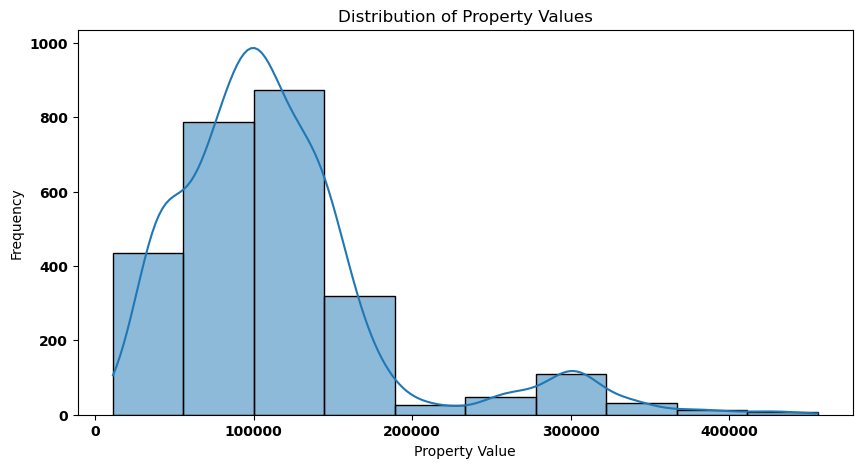

In [17]:
# Visualize the distribution of real estate prices
plt.figure(figsize=(10, 5))
sns.histplot(df_long['value'], bins=10, kde=True)
plt.xlabel('Property Value')
plt.ylabel('Frequency')
plt.title('Distribution of Property Values')
plt.show()

* From the plot, we can infer the common price ranges within these top-performing zip codes and identify any patterns or anomalies. This knowledge aids in understanding the typical property values in these areas and can inform investment decisions.

* The distribution of real estate values is right-skewed, with a long tail on the right side, indicating that the majority of the property values are concentrated in the lower price range.

* The shape of the distribution suggests that the real estate market consists of a mix of moderately priced properties and a smaller number of high-priced properties which form the tail of the distribution.

#### **b) Time Series Plot for the median property values of the top 10 zip codes**

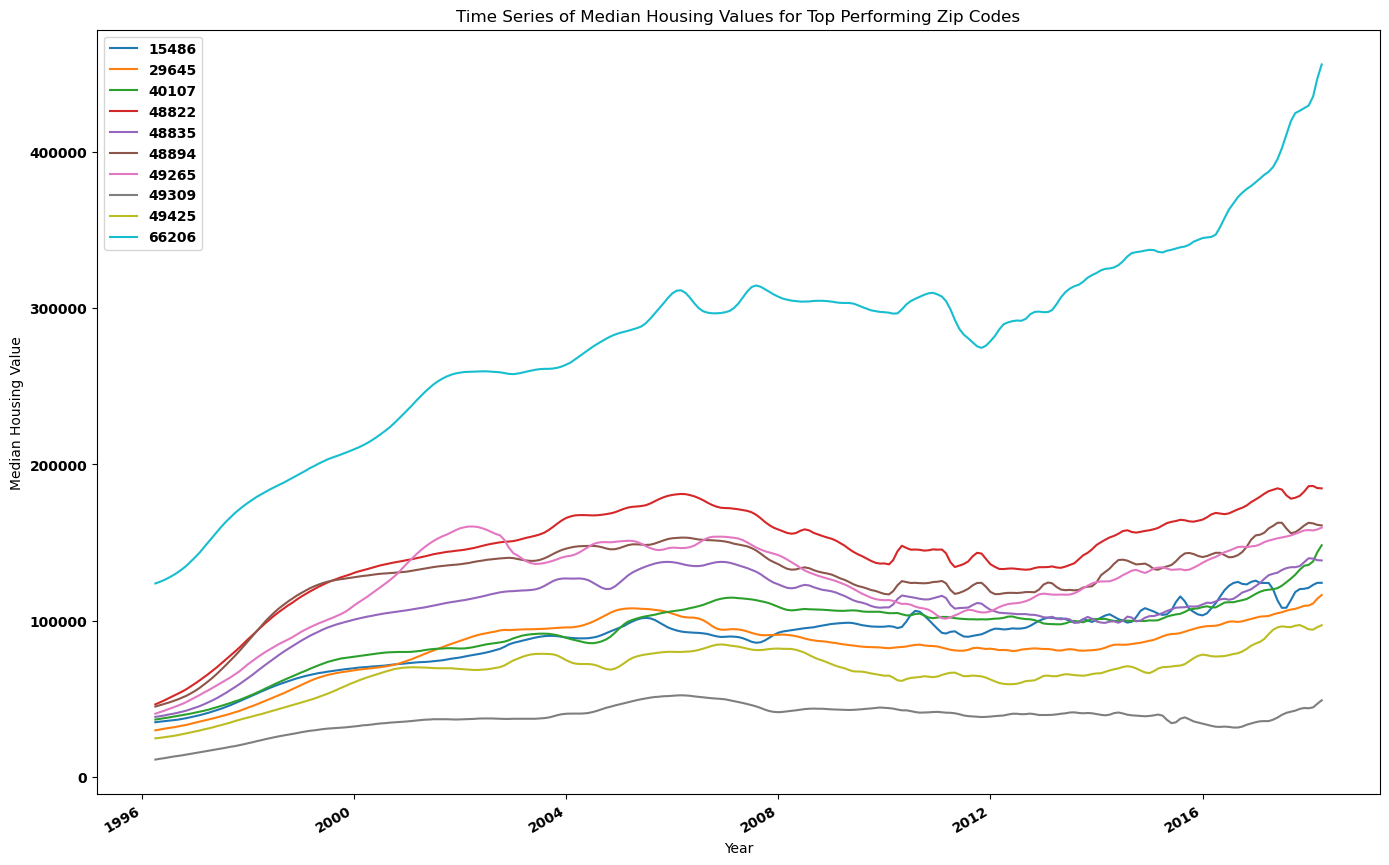

In [18]:
# Pivot the data to get median values for each zip code
pivot_df = df_long.pivot_table(index='Zipcode', columns='time', values='value', aggfunc='median')

pivot_df
# Sort zip codes by ROI in descending order
top_performers = df_long['ROI'].sort_values(ascending=False).head(10)
top_performers


# Assuming 'pivot_df' contains the pivot table of median housing sales values
plt.figure(figsize=(14, 10))
for col in pivot_df.index[:10]:  # Plot top 10 zip codes
    plt.plot(pivot_df.columns, pivot_df.loc[col], label=col)
plt.xlabel('Year')
plt.ylabel('Median Housing Value')
plt.title('Time Series of Median Housing Values for Top Performing Zip Codes')
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

* From this plot, we observe the historical trends in property values for each zip code. Some zip codes show steady appreciation over time, while others might have more volatility or distinct growth phases.
* There were noticeable dips around 2008-2010, which correspond with the global financial crisis. After this period, there's a clear recovery and steady growth for most Zipcodes.

#### **c) Distribution of Property Values for top 10 Zip Codes**

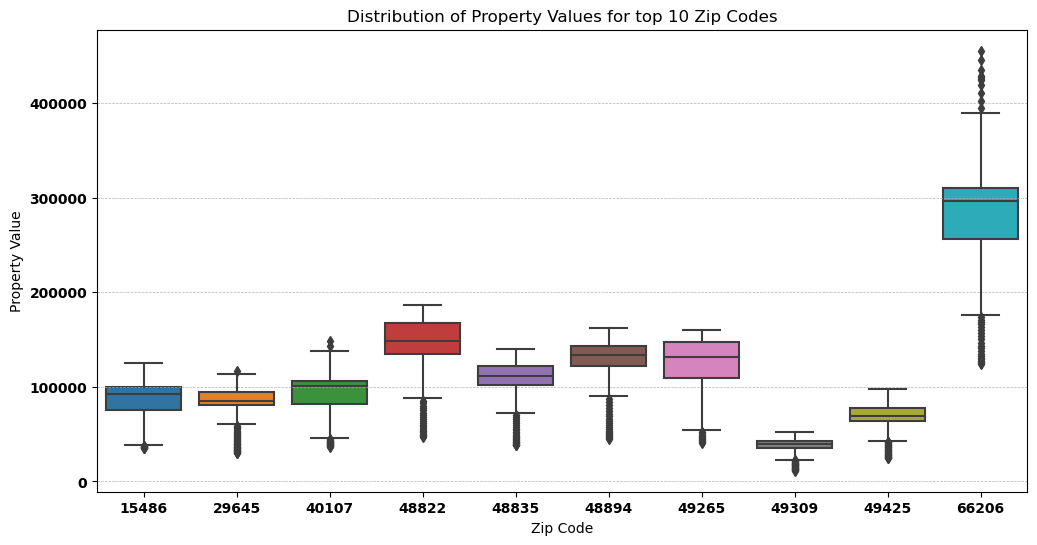

In [19]:
# Box Plot for distribution of property values for top 10 zip codes

# Filter out rows with non-numeric values in the 'value' column
df_long_filtered = df_long[pd.to_numeric(df_long['value'], errors='coerce').notna()]
df_long_filtered['value'] = df_long_filtered['value'].astype(float)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long_filtered, x='Zipcode', y='value')
plt.title('Distribution of Property Values for top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Property Value')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()


* From the plot, you can infer the median, variability, and potential outliers in property values for each zip code.

#### **d) Return on Investment (ROI) for top 10 Zip Codes**

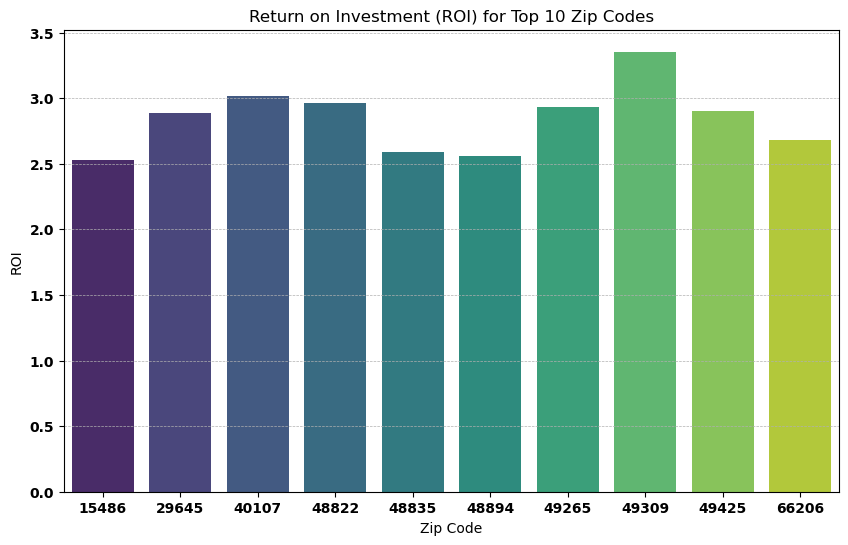

In [20]:
# Bar Plot to compare ROI for top 10 zip codes

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Zipcode', y='ROI', palette='viridis')
plt.title('Return on Investment (ROI) for Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('ROI')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.show()


* From this visualization, we can infer that Zipcode 49309 has yielded the highest ROI over the years, followed by 40107.

#### **e) Scatter Plot showing ROI vs. Coefficient of Variance (CV) for top 10 Zip Codes**

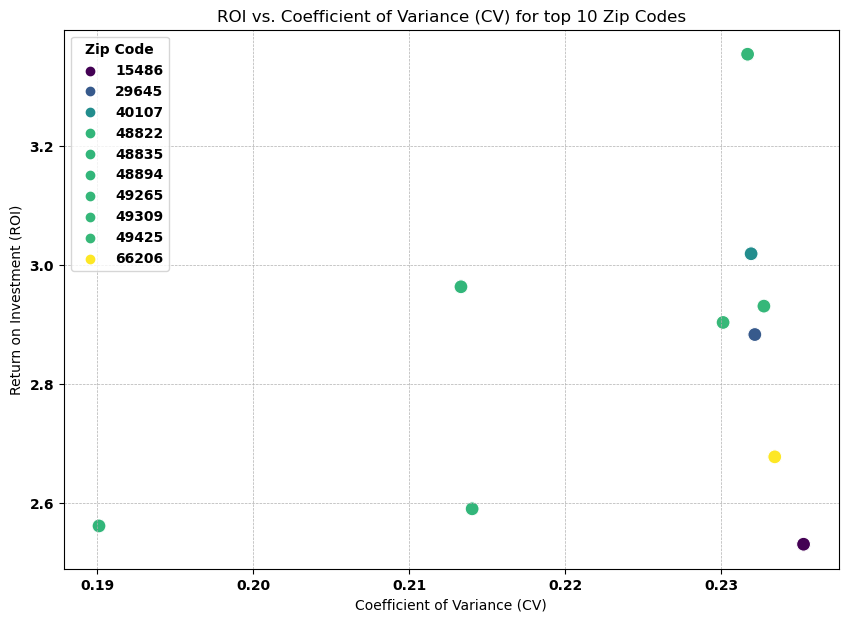

In [21]:
# Scatter Plot to show relationship between ROI and CV for top 10 zip codes

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_long, x='CV', y='ROI', hue='Zipcode', s=100, palette='viridis', legend='full')
plt.title('ROI vs. Coefficient of Variance (CV) for top 10 Zip Codes')
plt.xlabel('Coefficient of Variance (CV)')
plt.ylabel('Return on Investment (ROI)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Zip Code')
plt.show()


* The scatter plot provides insights into the trade-off between risk (volatility in property values) and return (historical appreciation). Zip codes closer to the top-left corner offer higher ROI with lower risk, making them more desirable for investment.

#### **f) Time series Analysis**

In [22]:
TS_top10 = df_long

# Set the time column as the index
top_10_index = TS_top10.set_index('time')

print('Time series data for the 10 zip codes:\n', TS_top10.head())

# Create individualized time series for each zipcode
dfs_ts = []

for zc in TS_top10['Zipcode'].unique():
    # Create separate dataframes for each zipcode with a monthly frequency
    df = top_10_index[top_10_index['Zipcode'] == zc].asfreq('MS')
    dfs_ts.append(df)

# Print the time series data for the first zipcode in the list
print(f'\nZipcode {TS_top10["Zipcode"].unique()[0]} time series:')
dfs_ts[0].head()

Time series data for the 10 zip codes:
    RegionID  Zipcode    City State  SizeRank       ROI        CV  \
0     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1     75522    40107  Boston    KY     13357  3.018970  0.231908   
2     79397    48822   Eagle    MI     12964  2.963519  0.213312   
3     79648    49265  Onsted    MI     10691  2.931034  0.232729   
4     79742    49425  Holton    MI     12239  2.903614  0.230111   

            std           mean       time    value  
0   8755.699818   37791.698113 1996-04-01  11300.0  
1  21638.431224   93306.037736 1996-04-01  36900.0  
2  30813.609976  144453.207547 1996-04-01  46600.0  
3  28923.199467  124278.490566 1996-04-01  40600.0  
4  15550.058490   67576.226415 1996-04-01  24900.0  

Zipcode 49309 time series:


RegionID  Zipcode    City State  SizeRank       ROI        CV  \
time                                                                        
1996-04-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1996-05-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1996-06-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1996-07-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
1996-08-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   

                    std          mean    value  
time                                            
1996-04-01  8755.699818  37791.698113  11300.0  
1996-05-01  8755.699818  37791.698113  11800.0  
1996-06-01  8755.699818  37791.698113  12200.0  
1996-07-01  8755.699818  37791.698113  12700.0  
1996-08-01  8755.699818  37791.698113  13200.0

In [23]:
# Descriptive statistics for the chosen zipcodes
for i in range(len(dfs_ts)):
    print(f'Value descriptive statistics for zipcode {dfs_ts[i].Zipcode[0]}:')
    print(f'{dfs_ts[i].value.describe()}\n')

Value descriptive statistics for zipcode 49309:
count      265.000000
mean     37791.698113
std       8755.699818
min      11300.000000
25%      34900.000000
50%      39600.000000
75%      43000.000000
max      52400.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 40107:
count       265.000000
mean      93306.037736
std       21638.431224
min       36900.000000
25%       82300.000000
50%      100500.000000
75%      106700.000000
max      148300.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 48822:
count       265.000000
mean     144453.207547
std       30813.609976
min       46600.000000
25%      134700.000000
50%      148500.000000
75%      167400.000000
max      186200.000000
Name: value, dtype: float64

Value descriptive statistics for zipcode 49265:
count       265.000000
mean     124278.490566
std       28923.199467
min       40600.000000
25%      109900.000000
50%      132100.000000
75%      147100.000000
max      160300.

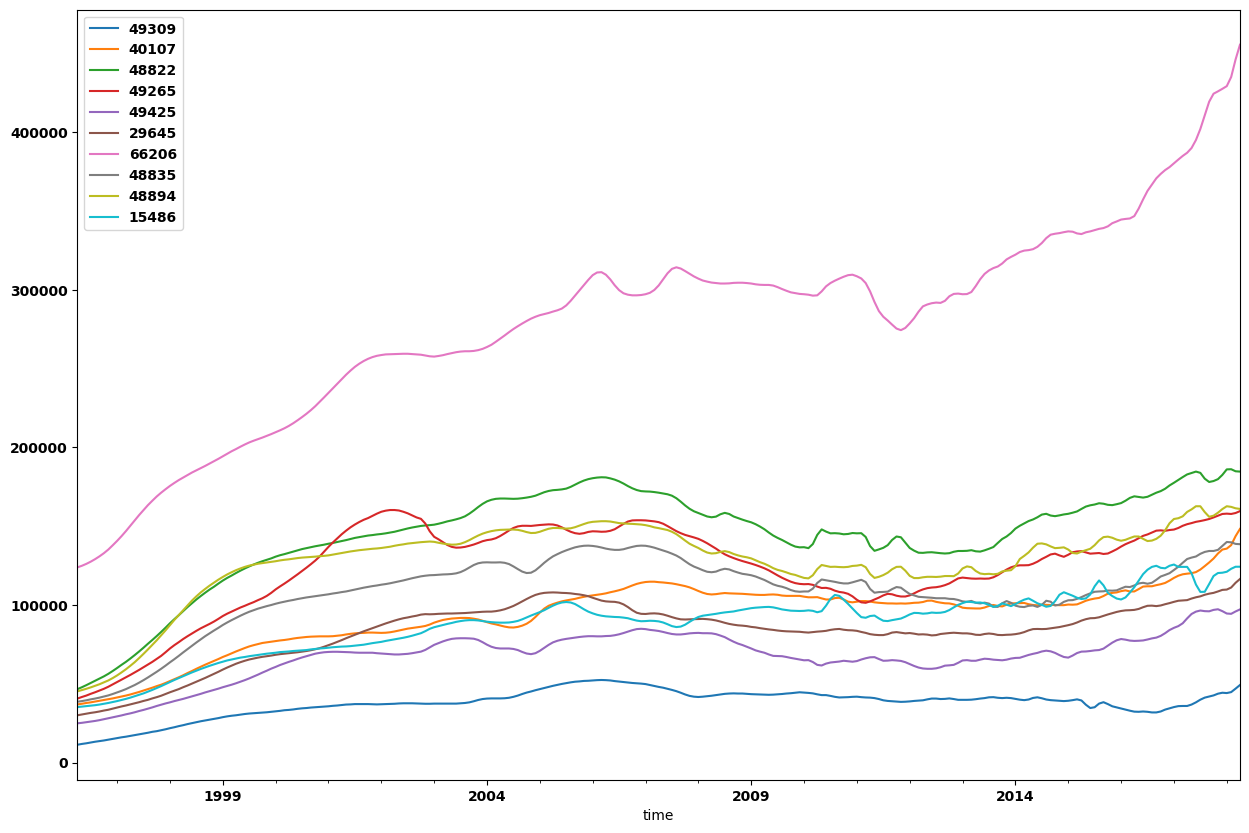

In [24]:
# Time series plots for the chosen zipcodes
for i in range(10):
    dfs_ts[i].value.plot(label=dfs_ts[i].Zipcode[0],figsize=(15,10))
    plt.legend()

* From this plot, you can observe the historical trends and patterns in property values for each zip code. Some zip codes show steady appreciation over time, while others might have periods of stagnation or more pronounced fluctuations.

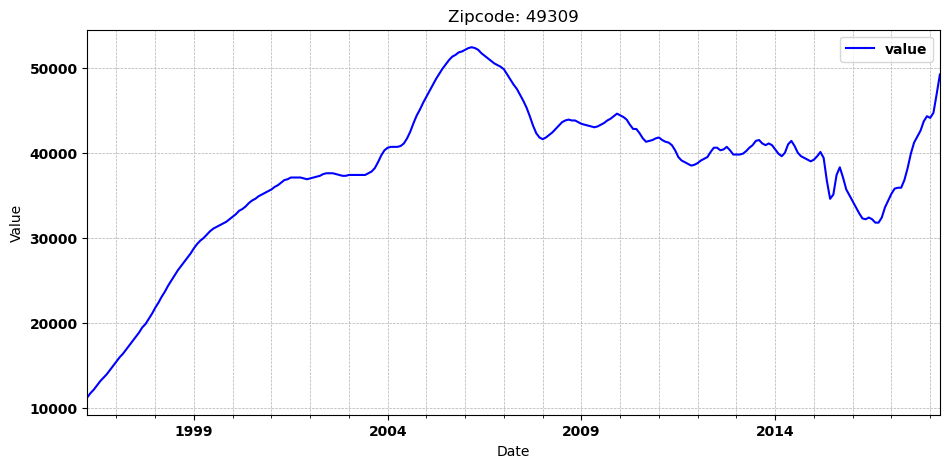

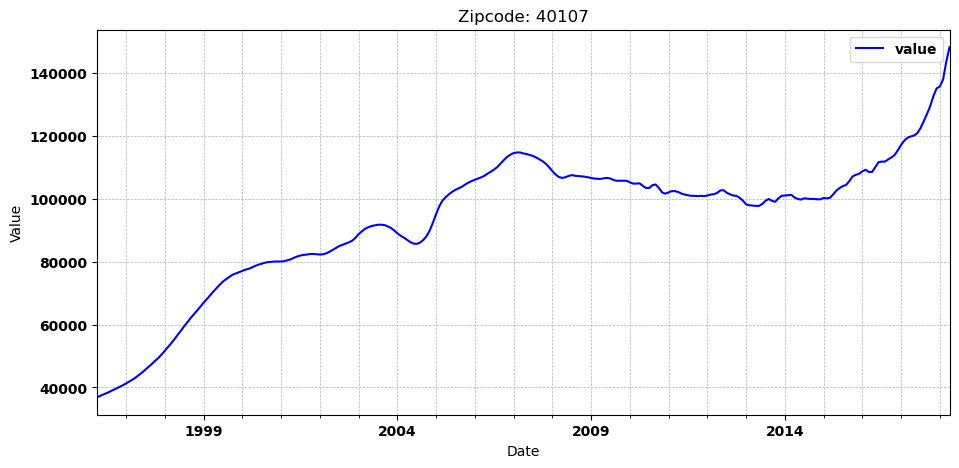

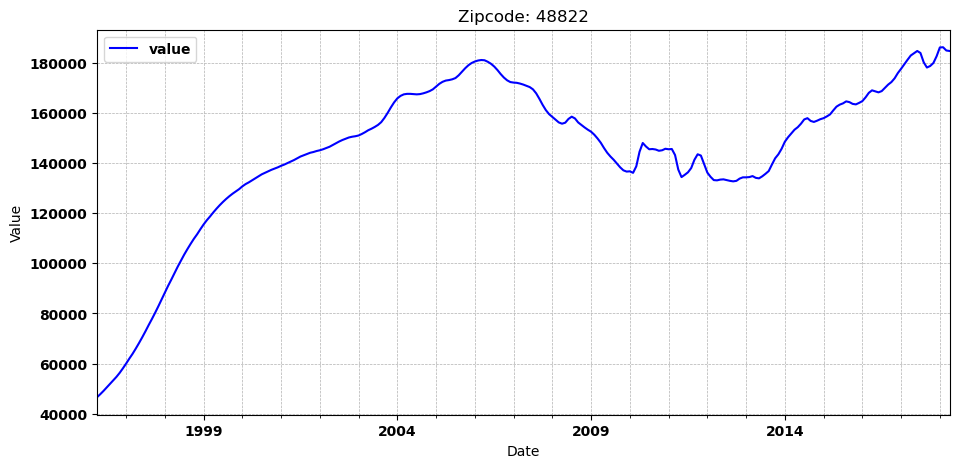

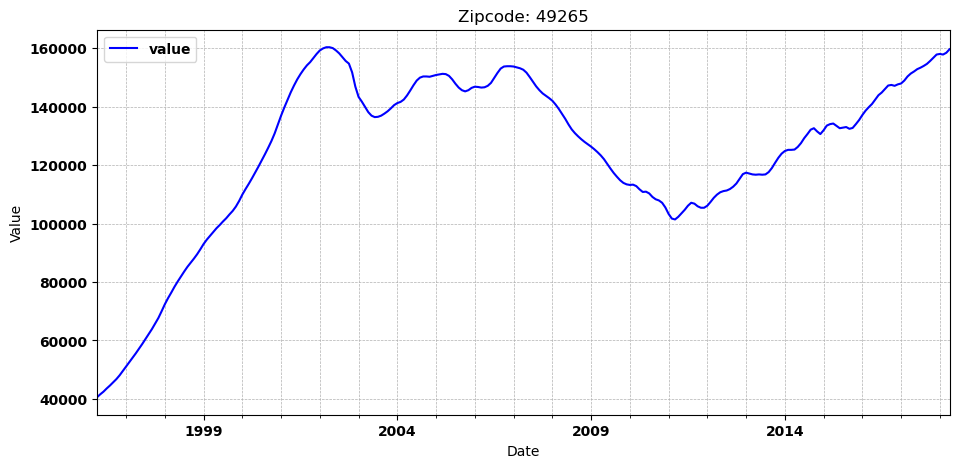

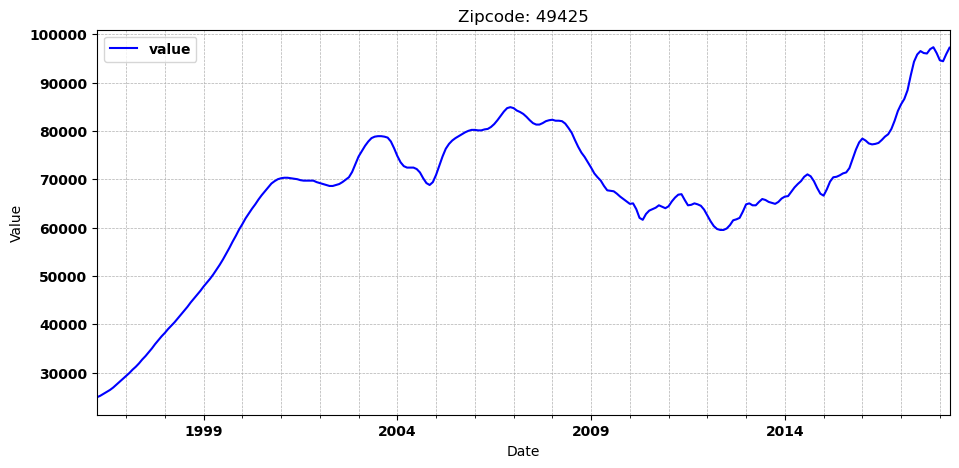

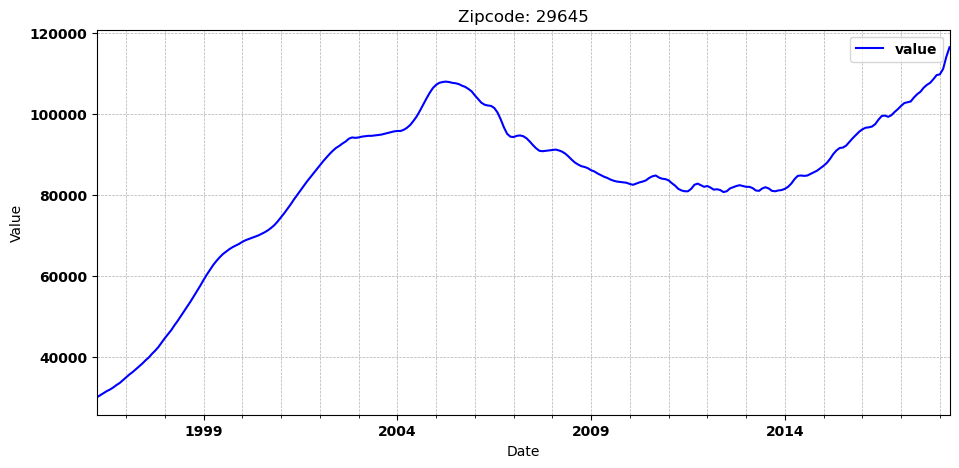

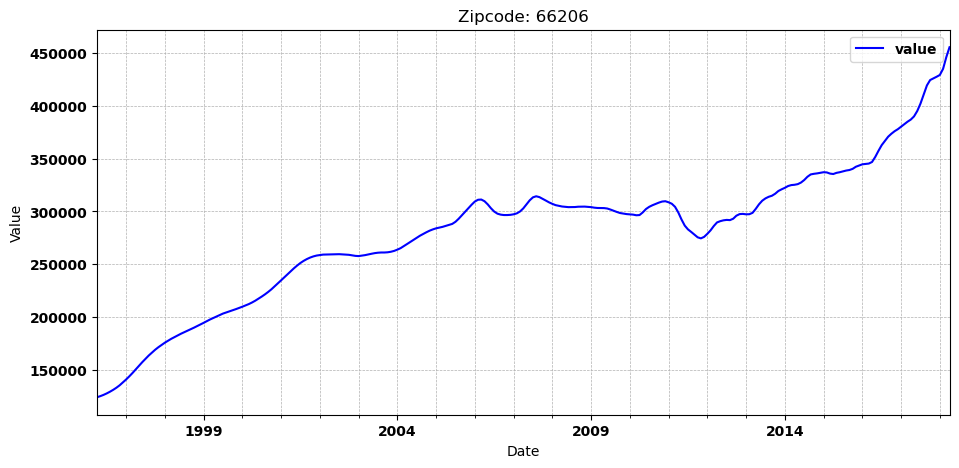

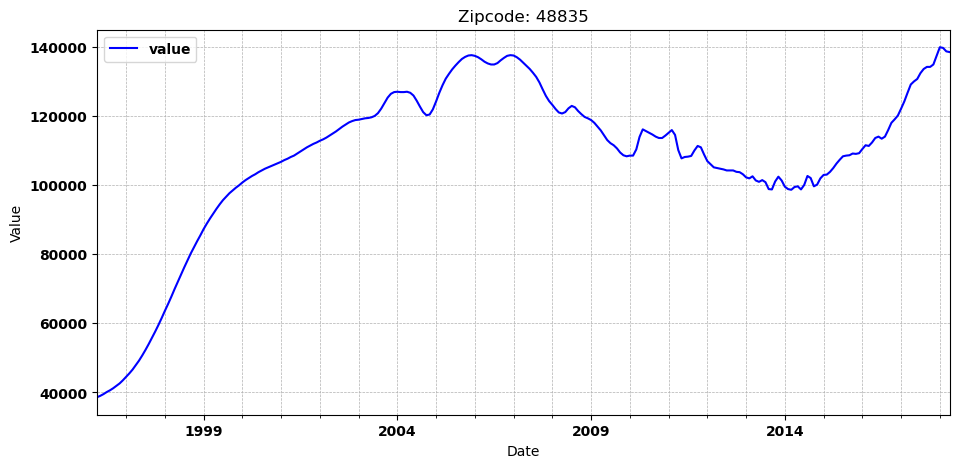

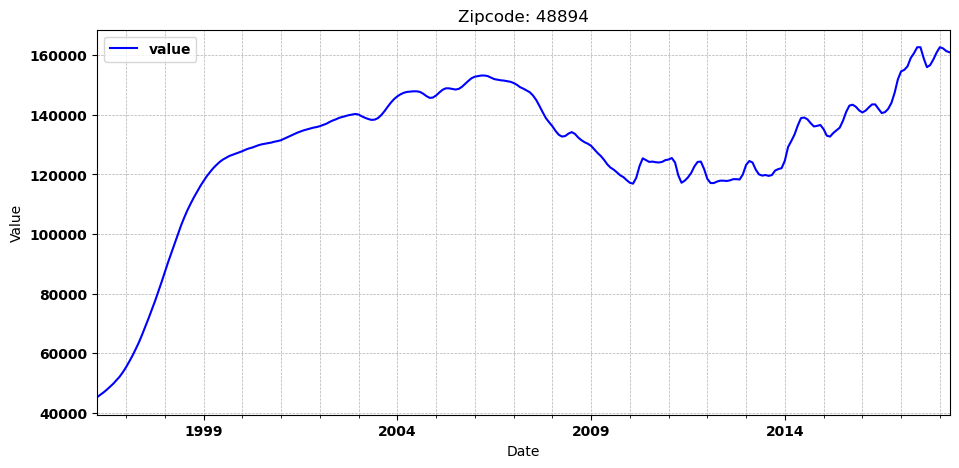

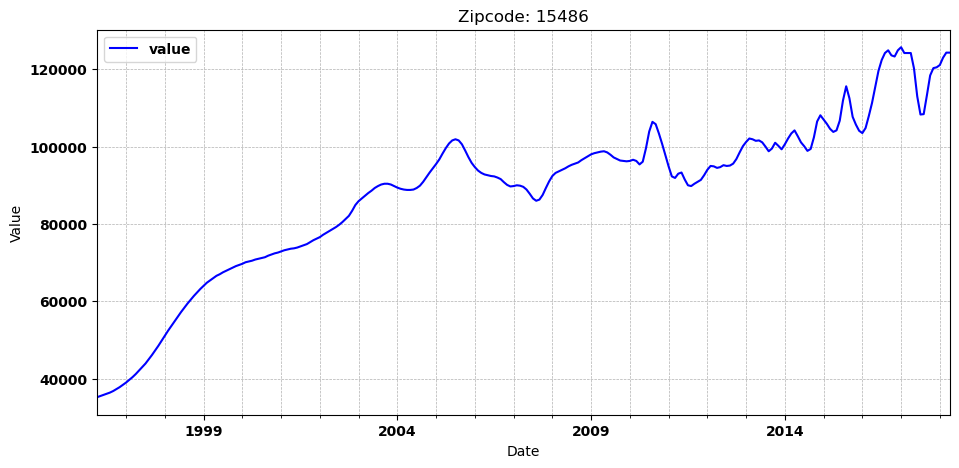

In [25]:
# Visualizing the housing prices per zipcode
for zc in range(len(dfs_ts)):
    dfs_ts[zc]['ret'] = dfs_ts[zc]['value']

# Plotting the monthly returns for each of the top 10 zip codes
for i in range(len(dfs_ts)):
    dfs_ts[i]['value'].plot(figsize=(11,5), color = 'b')
    plt.title(f'Zipcode: {dfs_ts[i].Zipcode.iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


* These graphs shows the fluctuations in returns over time for each zip code. The monthly returns highlight the volatility, trends, and potential patterns in the property values.

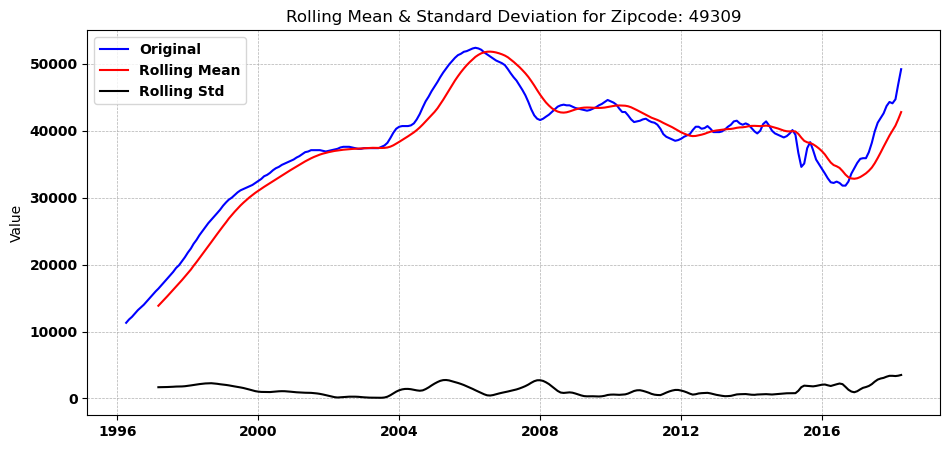

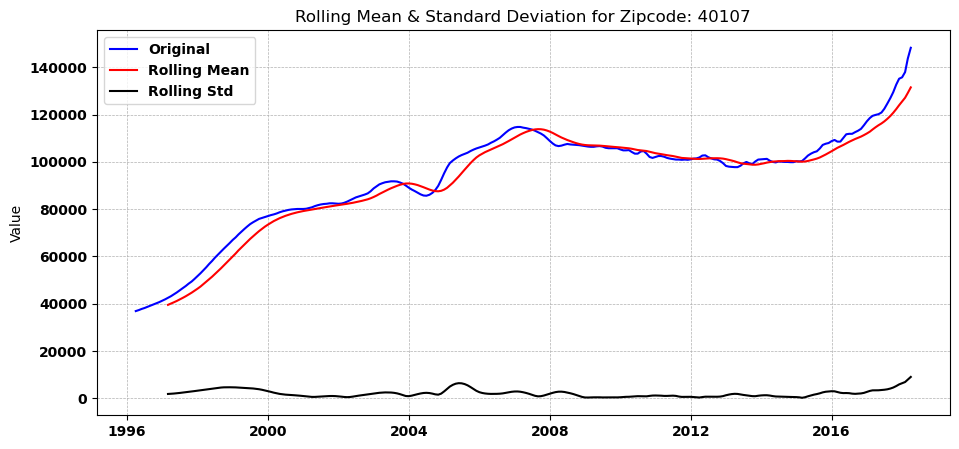

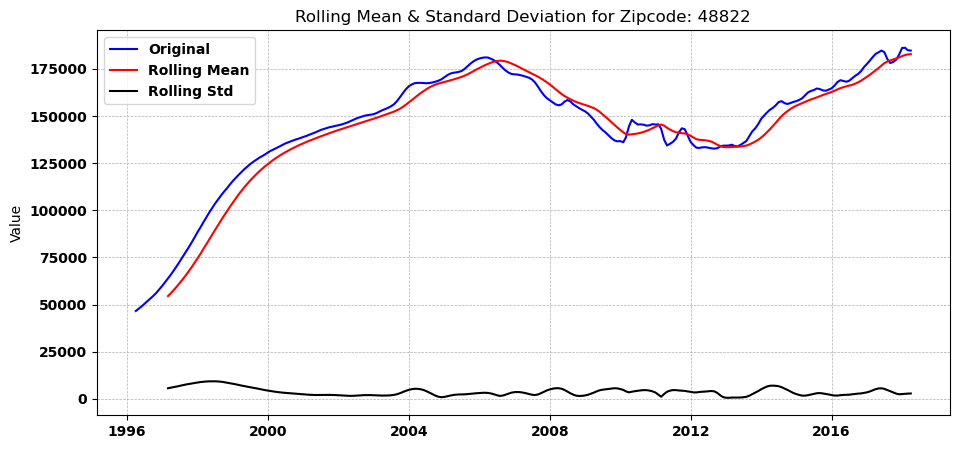

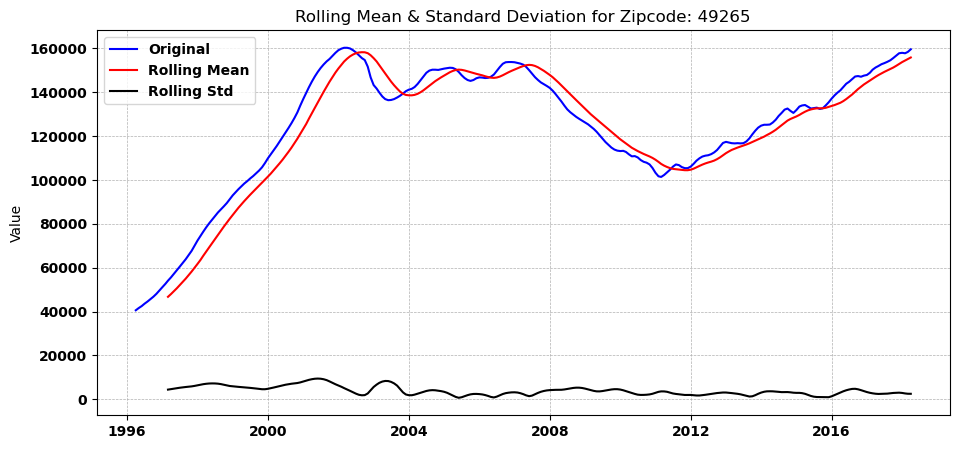

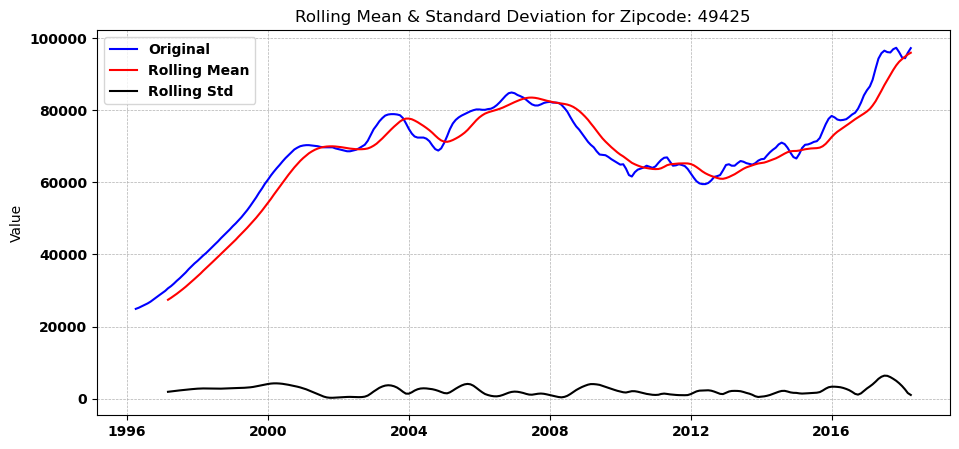

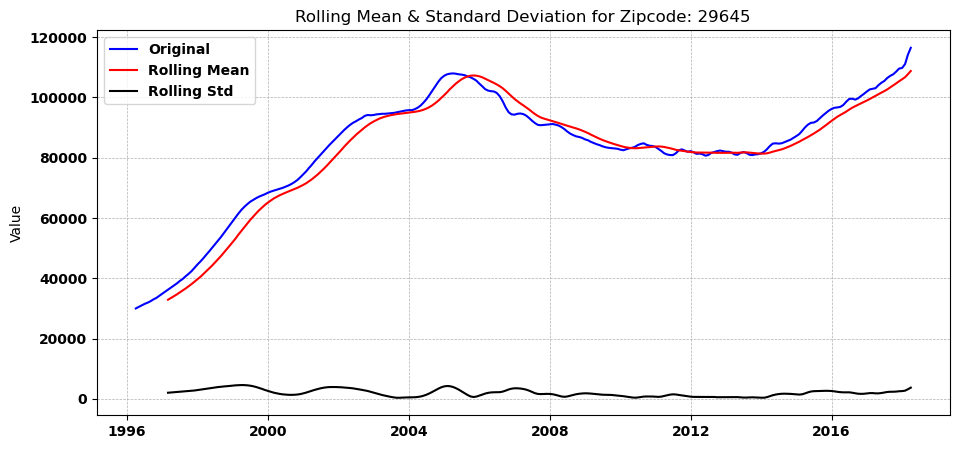

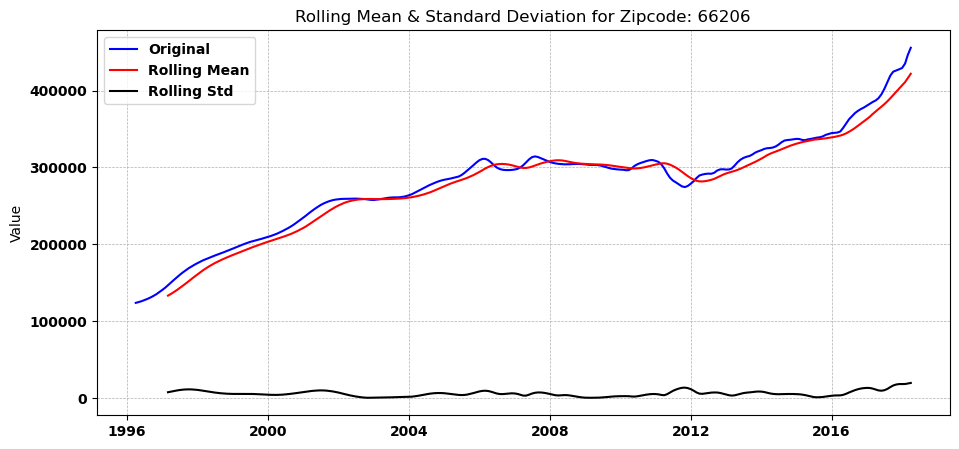

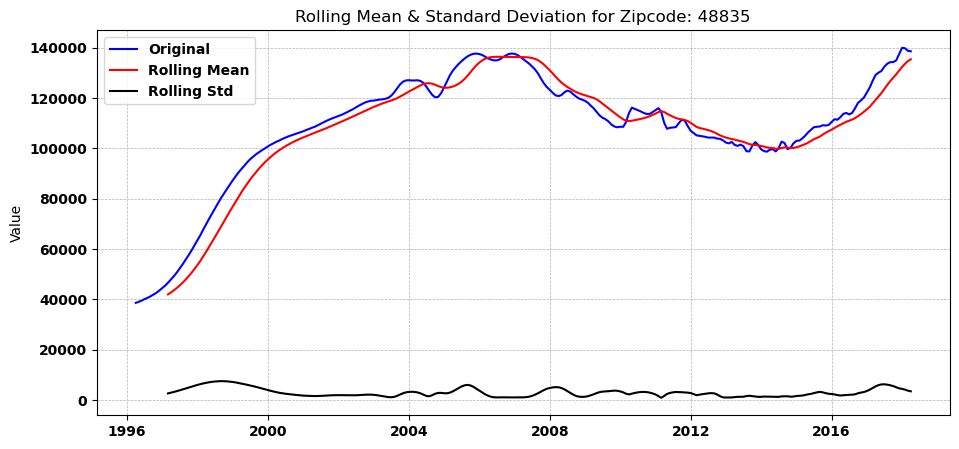

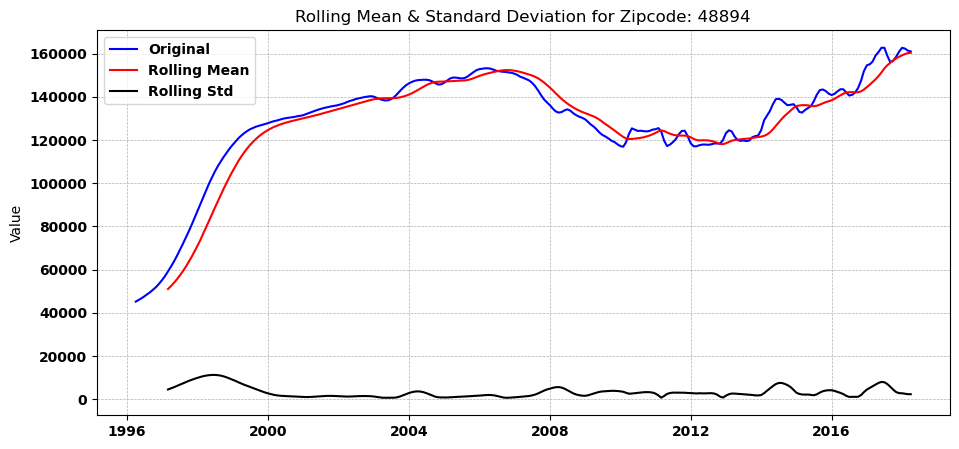

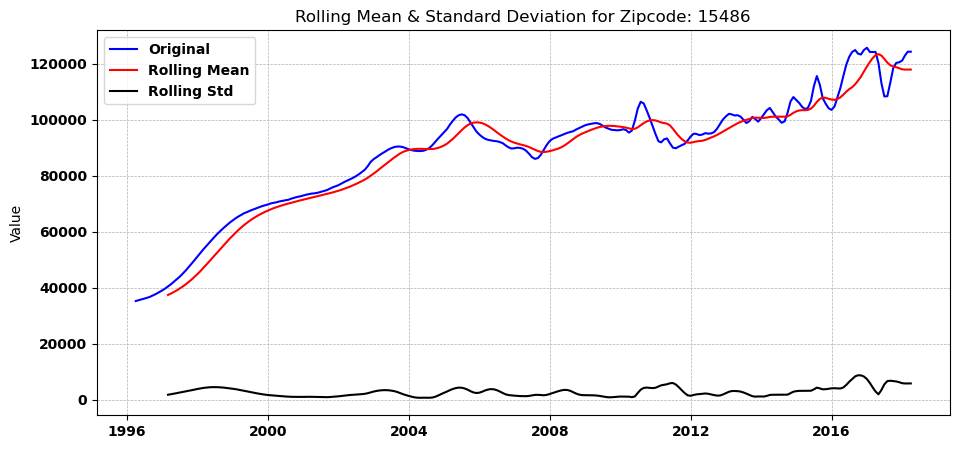

In [26]:
# Plotting monthly returns with their respective rolling mean and rolling std for each of the top 10 zip codes
for i in range(len(dfs_ts)):
    rolmean = dfs_ts[i]['value'].rolling(window=12, center=False).mean()
    rolstd = dfs_ts[i]['value'].rolling(window=12, center=False).std()

    # Plotting the metrics
    fig = plt.figure(figsize=(11,5))
    orig = plt.plot(dfs_ts[i]['value'], color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {dfs_ts[i].Zipcode.iloc[0]}')
    plt.ylabel('Value')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


* At a first glance, the data appears to exhibit a stable pattern. To ascertain the extent of this stability, we will proceed to conduct the Augmented Dickey-Fuller test. This test will provide a deeper insight into the stationarity of the data by subjecting it to a statistical challenge. In essence, the test posits the null hypothesis that an order of integration exists within the data, implying it's non-stationary. Conversely, the alternative hypothesis suggests the absence of such integration, indicating data stationarity.

* Employing a confidence level of 95%, my criterion for rejecting the null hypothesis rests on a p-value lower than 0.05. This choice allows for a robust determination of whether the data is truly stationary or not.

In [27]:
# Check for stationarity
for i in range(10):
    results = adfuller(dfs_ts[i].ret.dropna())
    print(f'ADFuller test p-value for zipcode: {dfs_ts[i].Zipcode[0]}')
    print('p-value:',results[1])
    if results[1]>0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

ADFuller test p-value for zipcode: 49309
p-value: 0.14237302731657148
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 40107
p-value: 0.9550929842851095
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 48822
p-value: 0.06934714490501494
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 49265
p-value: 0.12368703580975632
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 49425
p-value: 0.34712161138449393
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 29645
p-value: 0.606493310142294
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 66206
p-value: 0.993859571845456
Fail to reject the null hypothesis. Data is not stationary.

ADFuller test p-value for zipcode: 48835
p-value: 0.051938355937325154
Fail to reject th

#### **i) Differencing  the non-stationary time series and visualizing them**

ADFuller test p-value for differenced series of zipcode: 49309
p-value: 0.00023355632659852017
Reject the null hypothesis. Differenced data is stationary.



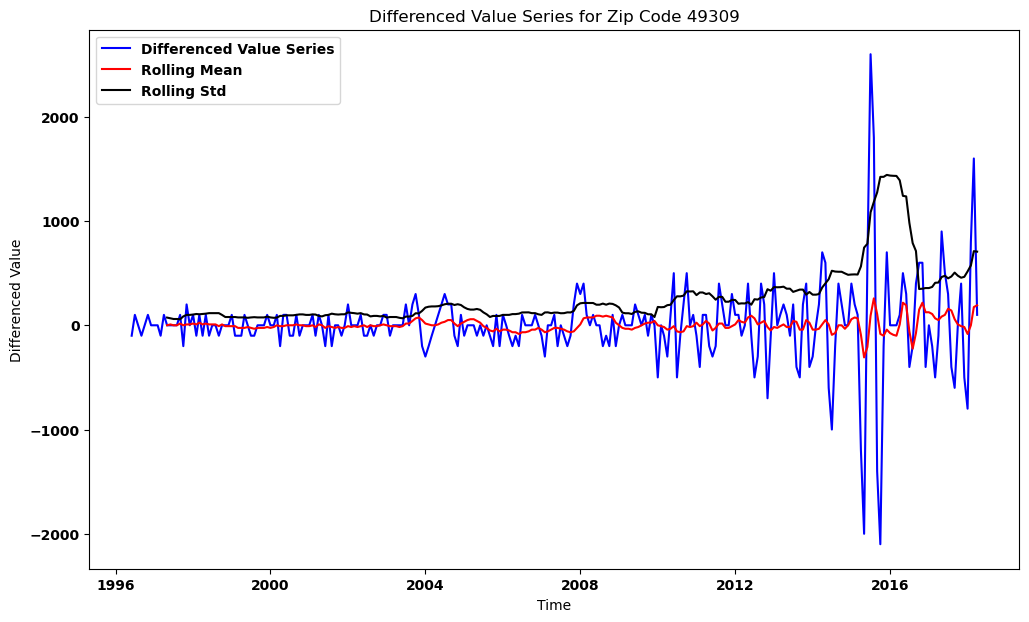

ADFuller test p-value for differenced series of zipcode: 40107
p-value: 1.6566222819650127e-09
Reject the null hypothesis. Differenced data is stationary.



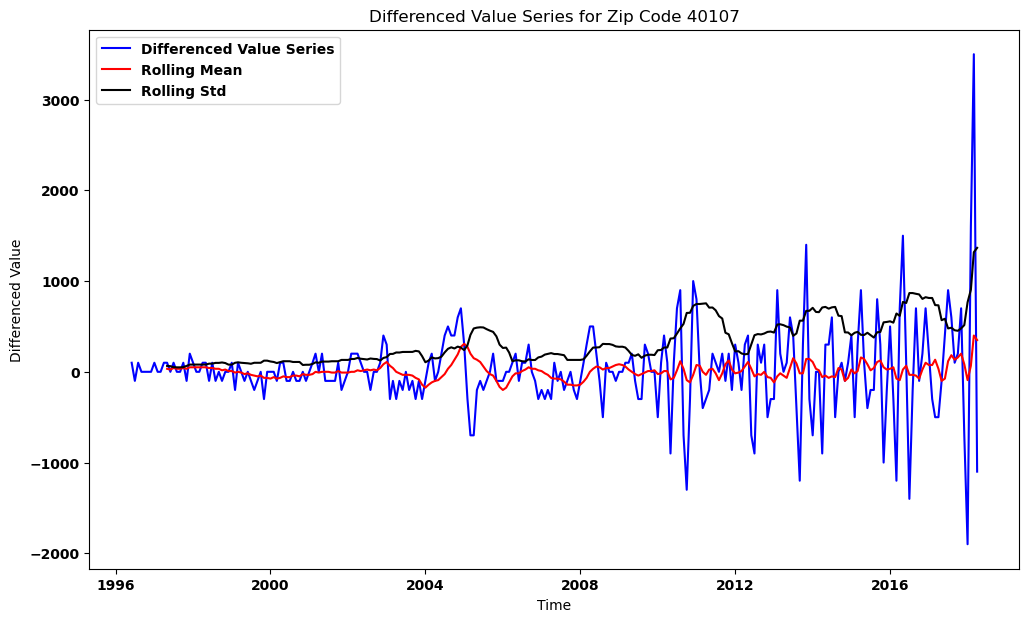

ADFuller test p-value for differenced series of zipcode: 48822
p-value: 1.6875246856620694e-12
Reject the null hypothesis. Differenced data is stationary.



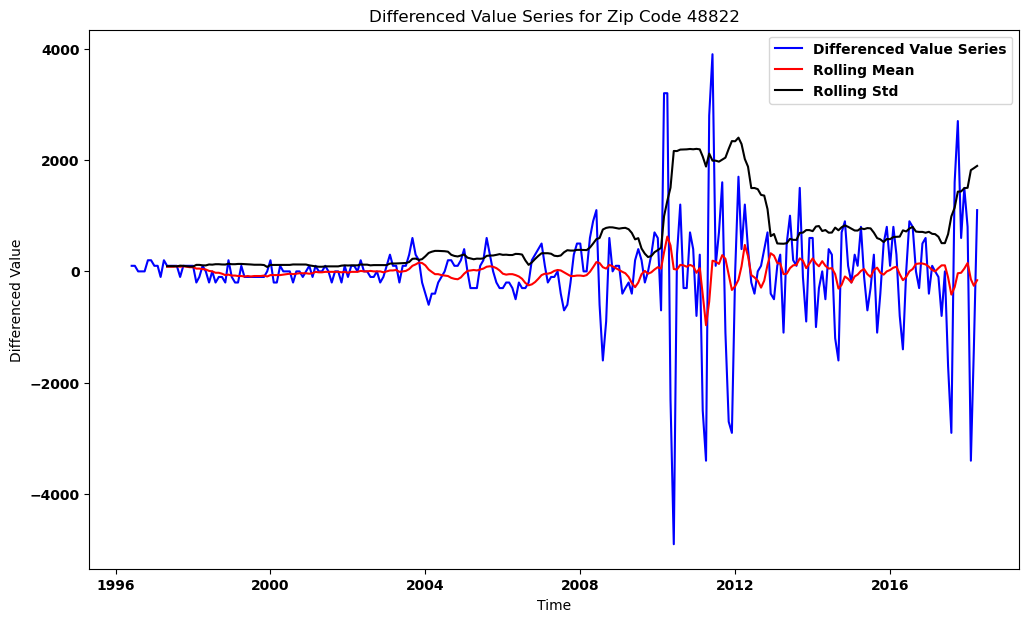

ADFuller test p-value for differenced series of zipcode: 49265
p-value: 1.7895122065251682e-05
Reject the null hypothesis. Differenced data is stationary.



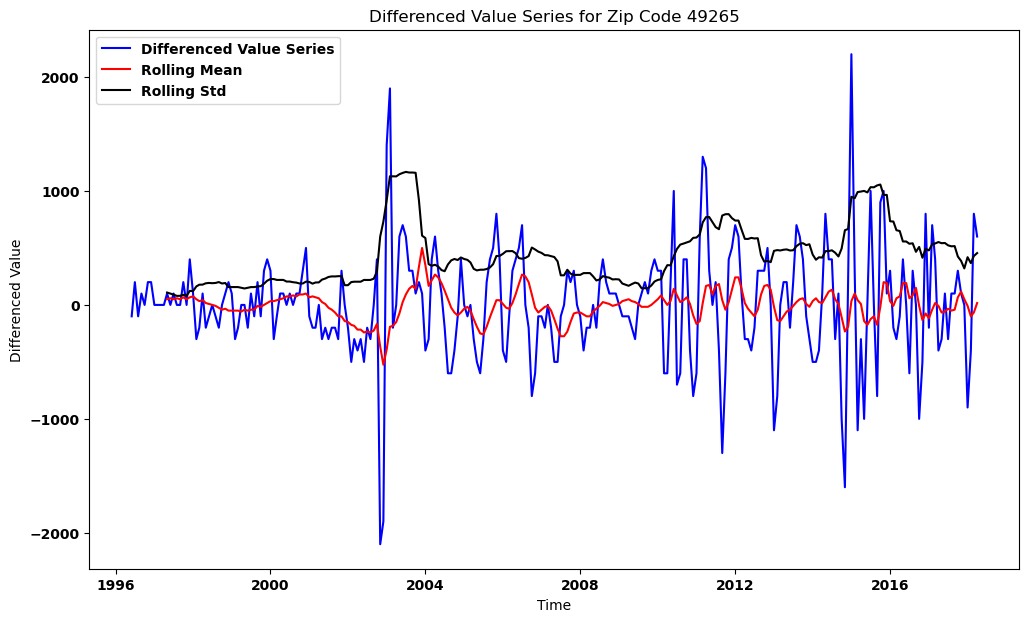

ADFuller test p-value for differenced series of zipcode: 49425
p-value: 1.7214650193724724e-11
Reject the null hypothesis. Differenced data is stationary.



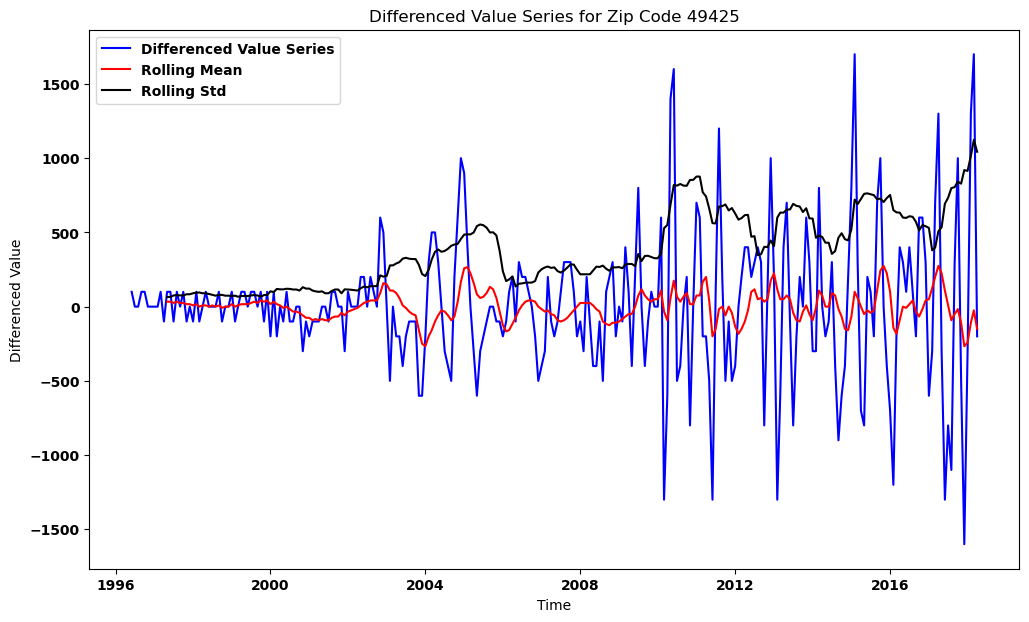

ADFuller test p-value for differenced series of zipcode: 29645
p-value: 3.089904083016291e-13
Reject the null hypothesis. Differenced data is stationary.



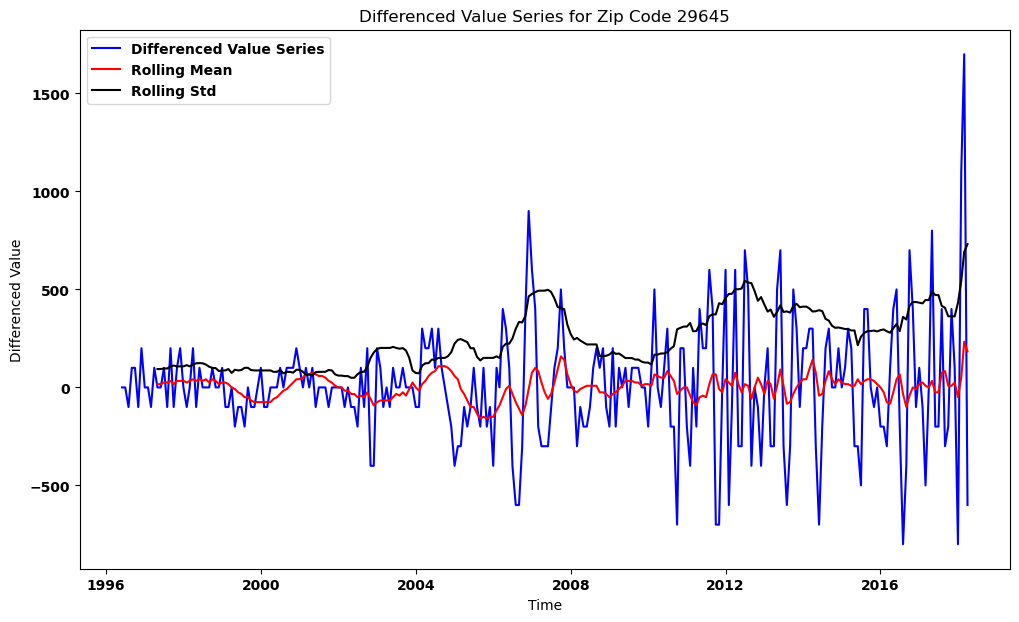

ADFuller test p-value for differenced series of zipcode: 66206
p-value: 2.2419500316559202e-07
Reject the null hypothesis. Differenced data is stationary.



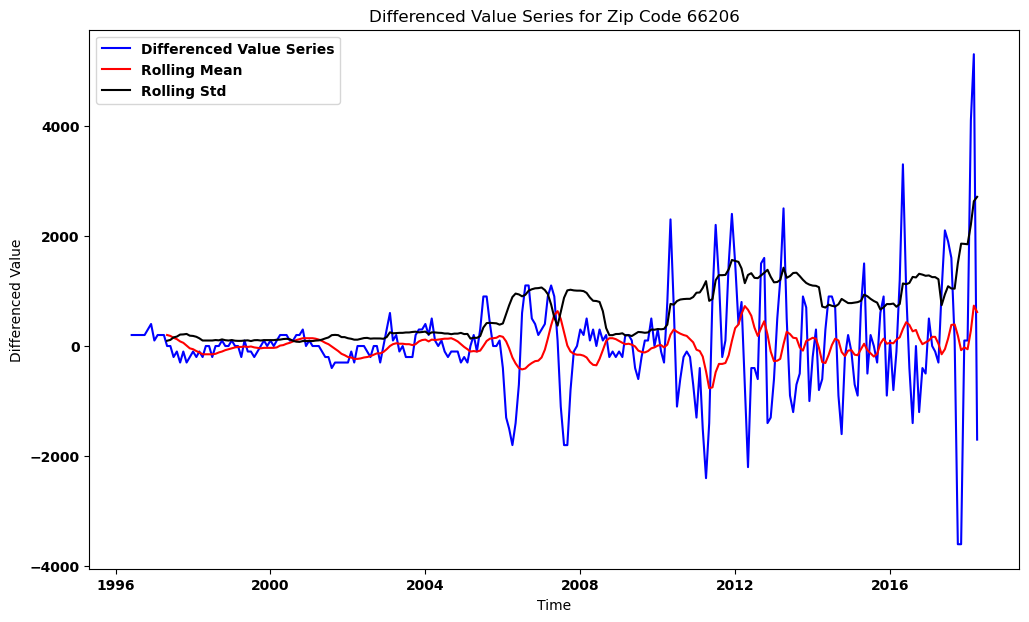

ADFuller test p-value for differenced series of zipcode: 48835
p-value: 1.4601641153388093e-10
Reject the null hypothesis. Differenced data is stationary.



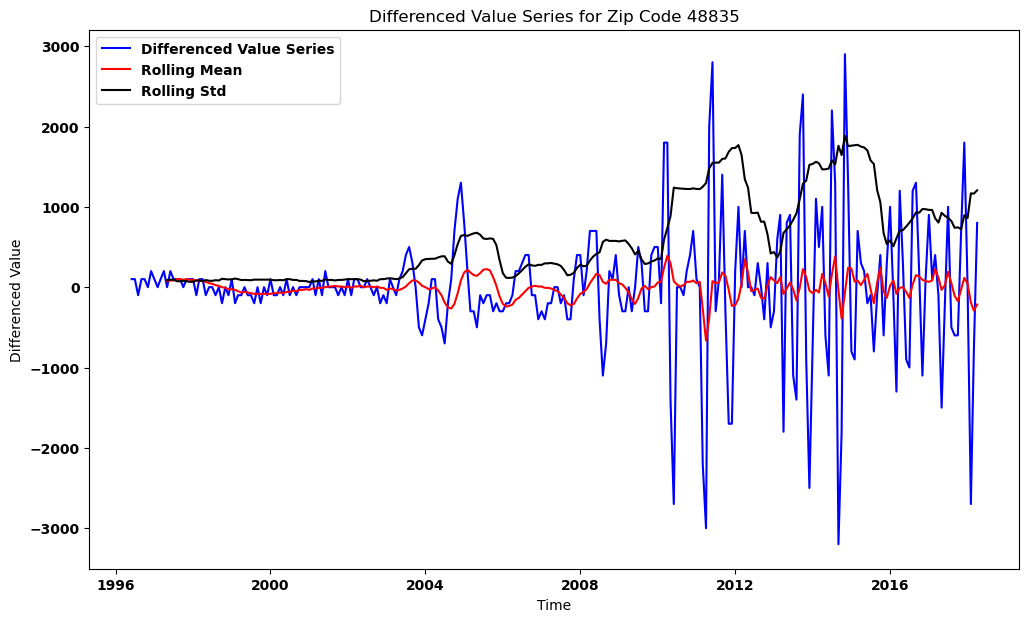

ADFuller test p-value for differenced series of zipcode: 48894
p-value: 2.7423702137801032e-14
Reject the null hypothesis. Differenced data is stationary.



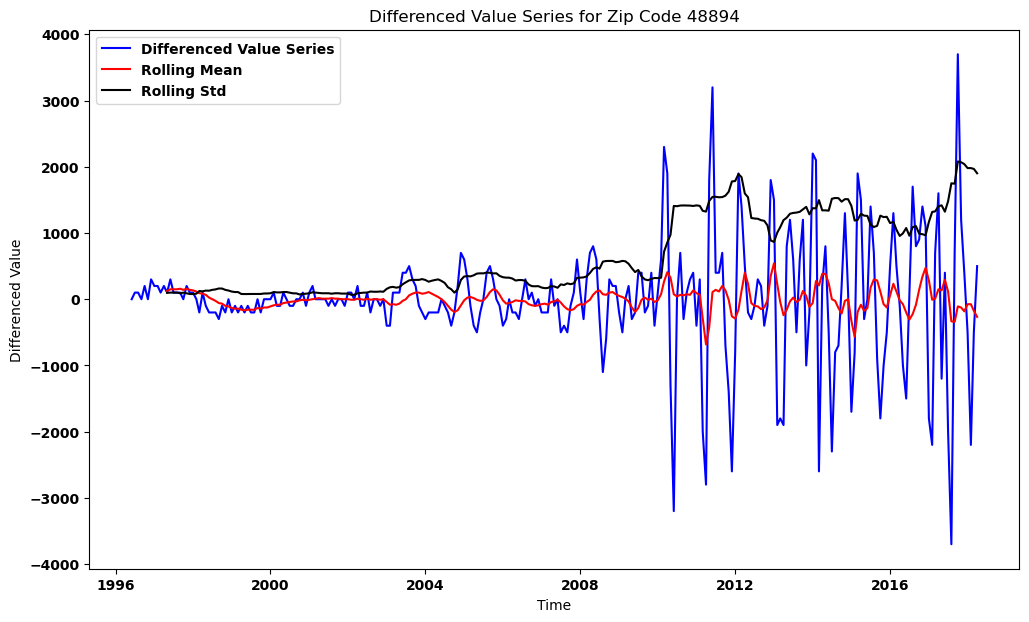

ADFuller test p-value for differenced series of zipcode: 15486
p-value: 5.333483230652911e-14
Reject the null hypothesis. Differenced data is stationary.



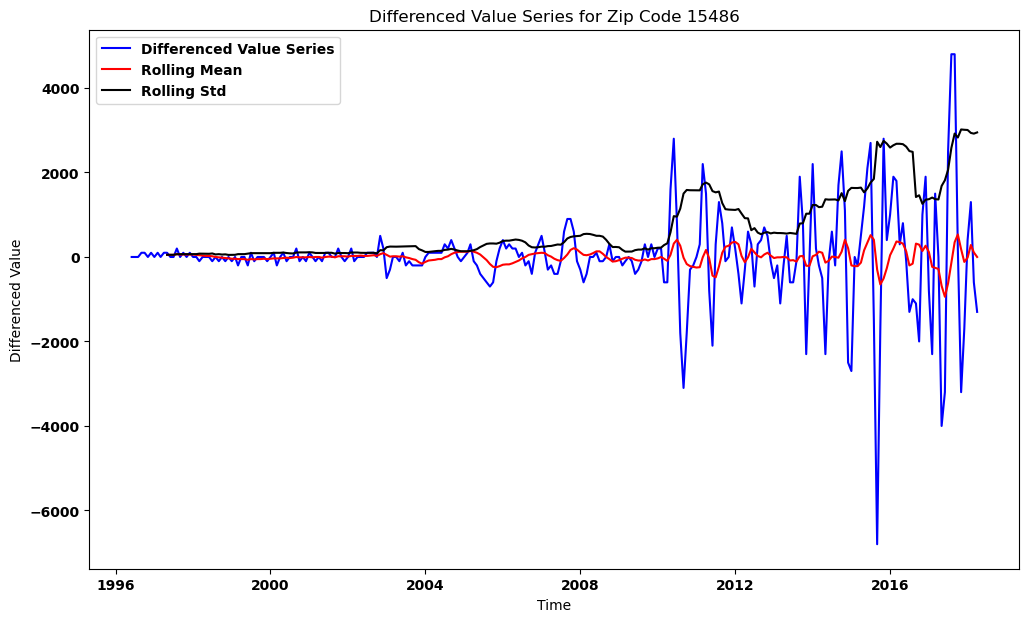

[(49309, 0.00023355632659852017),
 (40107, 1.6566222819650127e-09),
 (48822, 1.6875246856620694e-12),
 (49265, 1.7895122065251682e-05),
 (49425, 1.7214650193724724e-11),
 (29645, 3.089904083016291e-13),
 (66206, 2.2419500316559202e-07),
 (48835, 1.4601641153388093e-10),
 (48894, 2.7423702137801032e-14),
 (15486, 5.333483230652911e-14)]

In [28]:
# Differencing the non-stationary time series and testing for stationarity again
differenced_adf_results = []

for i in range(10):
    # Differencing the time series
    dfs_ts[i]['differenced_ret'] = dfs_ts[i]['ret'].diff().dropna()
    dfs_ts[i]['differenced_ret'] = dfs_ts[i]['differenced_ret'].diff().dropna()

    # Get the rolling mean and std
    rolmean = dfs_ts[i]['differenced_ret'].rolling(window=12, center=False).mean()
    rolstd = dfs_ts[i]['differenced_ret'].rolling(window=12, center=False).std()

    # Conducting the ADF test on the differenced series
    results = adfuller(dfs_ts[i]['differenced_ret'].dropna())
    zipcode = dfs_ts[i]['Zipcode'].iloc[0]
    p_value = results[1]
    differenced_adf_results.append((zipcode, p_value))

    # Displaying the results
    print(f'ADFuller test p-value for differenced series of zipcode: {zipcode}')
    print('p-value:', p_value)
    if p_value > 0.05:
        print('Fail to reject the null hypothesis. Differenced data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Differenced data is stationary.\n')

    # Plotting the differenced time series
    plt.figure(figsize=(12, 7))
    plt.plot(dfs_ts[i].index, dfs_ts[i]['differenced_ret'], color='blue', label='Differenced Value Series')
    plt.plot(rolmean, label='Rolling Mean', color='red')
    plt.plot(rolstd, label='Rolling Std', color='black')
    plt.title(f'Differenced Value Series for Zip Code {zipcode}')
    plt.xlabel('Time')
    plt.ylabel('Differenced Value')
    plt.legend()
    plt.show()

differenced_adf_results

 * By applying differencing, we  successfully transformed the non-stationary time series data into stationary data for all of our top 10 zip codes.
 * We will go ahead and plot their ACF and PACF plots, which will guide us on how to pass in our `p,d,q` parameters when fitting our time series models.

In [29]:
# The dataframes are contained in a list
dfs_ts

[            RegionID  Zipcode    City State  SizeRank       ROI        CV  \
 time                                                                        
 1996-04-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 1996-05-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 1996-06-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 1996-07-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 1996-08-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 ...              ...      ...     ...   ...       ...       ...       ...   
 2017-12-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 2018-01-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 2018-02-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 2018-03-01     79678    49309  Bitely    MI     13315  3.353982  0.231683   
 2018-04-01     79678    49309  Bitely    MI     13315  3.353982

In [30]:
# Concatenate the list of DataFrames into a single DataFrame
df_combined = pd.concat(dfs_ts)

# Print the resulting DataFrame
df_combined

RegionID  Zipcode      City State  SizeRank       ROI        CV  \
time                                                                          
1996-04-01     79678    49309    Bitely    MI     13315  3.353982  0.231683   
1996-05-01     79678    49309    Bitely    MI     13315  3.353982  0.231683   
1996-06-01     79678    49309    Bitely    MI     13315  3.353982  0.231683   
1996-07-01     79678    49309    Bitely    MI     13315  3.353982  0.231683   
1996-08-01     79678    49309    Bitely    MI     13315  3.353982  0.231683   
...              ...      ...       ...   ...       ...       ...       ...   
2017-12-01     64135    15486  Franklin    PA     13283  2.531250  0.235270   
2018-01-01     64135    15486  Franklin    PA     13283  2.531250  0.235270   
2018-02-01     64135    15486  Franklin    PA     13283  2.531250  0.235270   
2018-03-01     64135    15486  Franklin    PA     13283  2.531250  0.235270   
2018-04-01     64135    15486  Franklin    PA     13283  2.531250  0.235270   

                     std          mean     value       ret  differenced_ret  
time                                                                         
1996-04-01   8755.699818  37791.698113   11300.0   11300.0              NaN  
1996-05-01   8755.699818  37791.698113   11800.0   11800.0              NaN  
1996-06-01   8755.699818  37791.698113   12200.0   12200.0           -100.0  
1996-07-01   8755.699818  37791.698113   12700.0   12700.0            100.0  
1996-08-01   8755.699818  37791.698113   13200.0   13200.0              0.0  
...                  ...           ...       ...       ...              ...  
2017-12-01  20749.032919  88192.452830  120500.0  120500.0          -1700.0  
2018-01-01  20749.032919  88192.452830  121100.0  121100.0            400.0  
2018-02-01  20749.032919  88192.452830  123000.0  123000.0           1300.0  
2018-03-01  20749.032919  88192.452830  124300.0  124300.0           -600.0  
2018-04-01  20749.032919  88192.452830  124300.0  124300.0          -1300.0  

[2650 rows x 12 columns]

In [31]:
# Create a dictionary to store dataframes for each zipcode
zipcode_dataframes = {}

# Extract unique zipcodes from the dataframes
unique_zipcodes = df_combined['Zipcode'].unique()

# Iterate over unique zipcodes and create dataframes for each
for zipcode in unique_zipcodes:
    # Filter dataframe for the current zipcode
    zipcode_df = df_combined[df_combined['Zipcode'] == zipcode]

    # Drop rows with null values
    zipcode_df = zipcode_df.dropna()

    # Store the dataframe in the dictionary
    zipcode_dataframes[zipcode] = zipcode_df

# Access dataframe for a specific zipcode
# [49309, 40107, 48822, 49265, 49425, 29645, 66206, 48835, 48894, 15486]
zipcode_49309_df = zipcode_dataframes[49309]
zipcode_40107_df = zipcode_dataframes[40107]
zipcode_48822_df = zipcode_dataframes[48822]
zipcode_49265_df = zipcode_dataframes[49265]
zipcode_49425_df = zipcode_dataframes[49425]
zipcode_29645_df = zipcode_dataframes[29645]
zipcode_66206_df = zipcode_dataframes[66206]
zipcode_48835_df = zipcode_dataframes[48835]
zipcode_48894_df = zipcode_dataframes[48894]
zipcode_15486_df = zipcode_dataframes[15486]


# Confirm if it has worked
zipcode_15486_df

RegionID  Zipcode      City State  SizeRank      ROI       CV  \
time                                                                        
1996-06-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
1996-07-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
1996-08-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
1996-09-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
1996-10-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
...              ...      ...       ...   ...       ...      ...      ...   
2017-12-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
2018-01-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
2018-02-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
2018-03-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   
2018-04-01     64135    15486  Franklin    PA     13283  2.53125  0.23527   

                     std         mean     value       ret  differenced_ret  
time                                                                        
1996-06-01  20749.032919  88192.45283   35800.0   35800.0              0.0  
1996-07-01  20749.032919  88192.45283   36100.0   36100.0              0.0  
1996-08-01  20749.032919  88192.45283   36400.0   36400.0              0.0  
1996-09-01  20749.032919  88192.45283   36800.0   36800.0            100.0  
1996-10-01  20749.032919  88192.45283   37300.0   37300.0            100.0  
...                  ...          ...       ...       ...              ...  
2017-12-01  20749.032919  88192.45283  120500.0  120500.0          -1700.0  
2018-01-01  20749.032919  88192.45283  121100.0  121100.0            400.0  
2018-02-01  20749.032919  88192.45283  123000.0  123000.0           1300.0  
2018-03-01  20749.032919  88192.45283  124300.0  124300.0           -600.0  
2018-04-01  20749.032919  88192.45283  124300.0  124300.0          -1300.0  

[263 rows x 12 columns]

#### **ii) Plotting ACF and PACF**

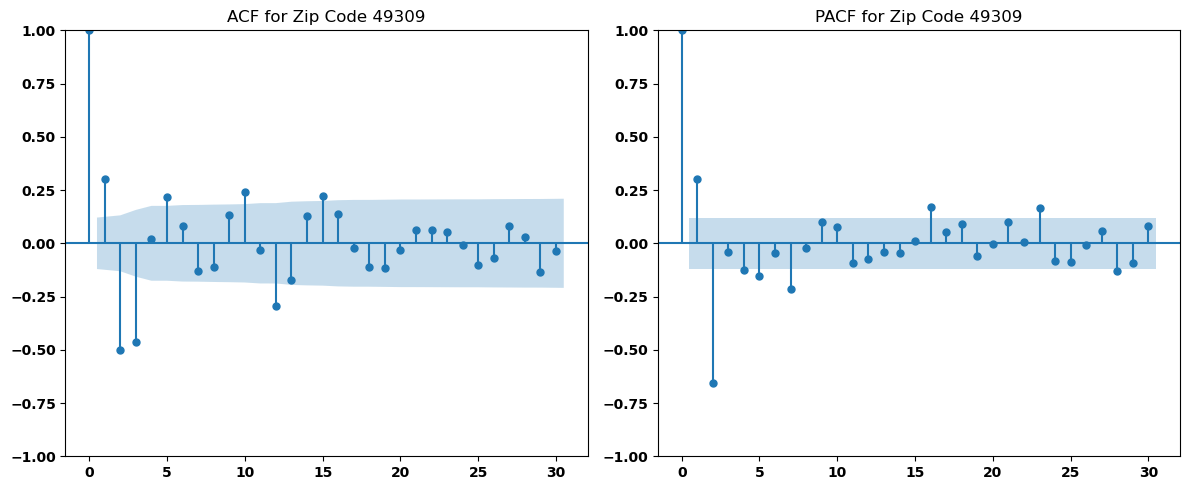

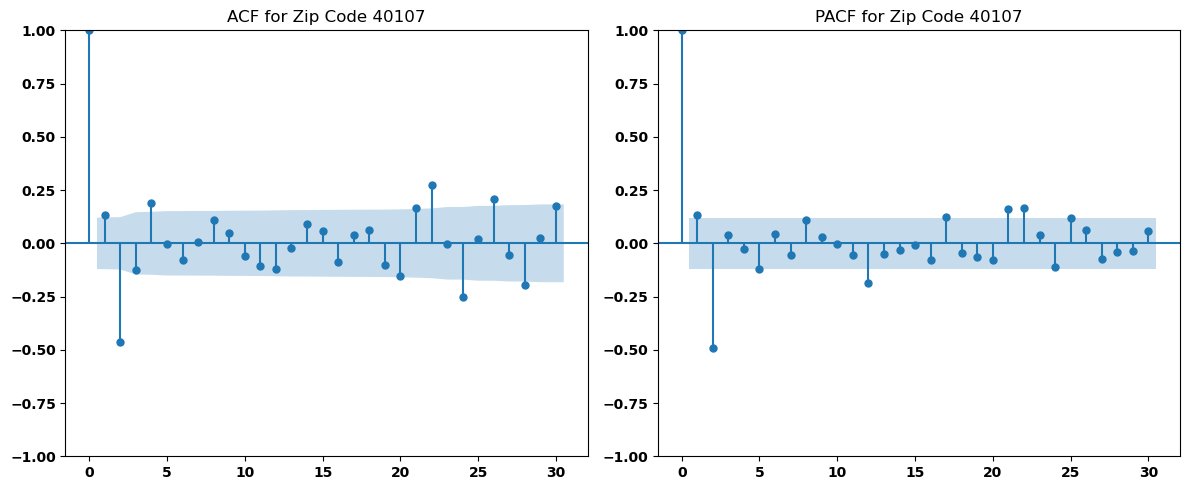

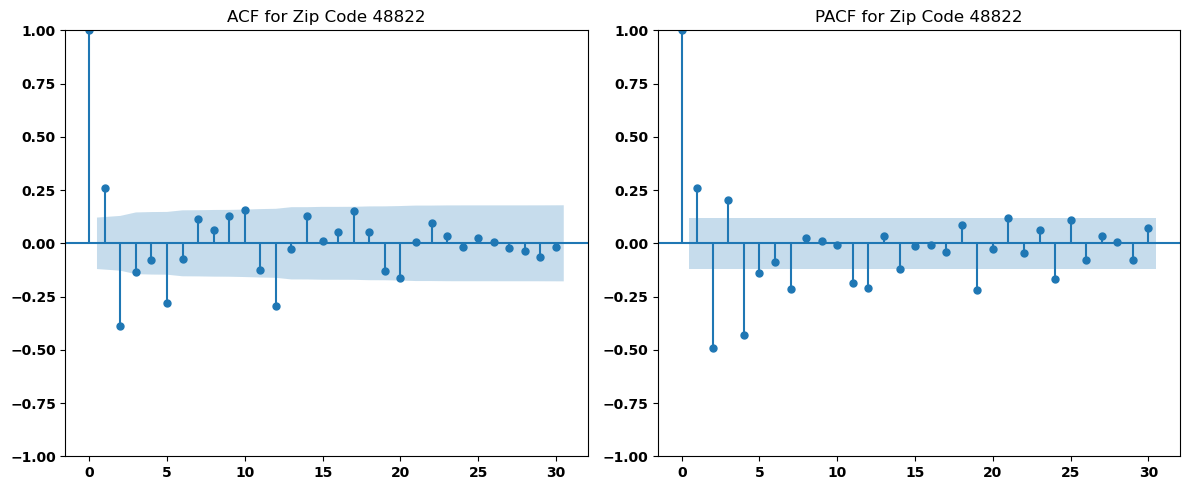

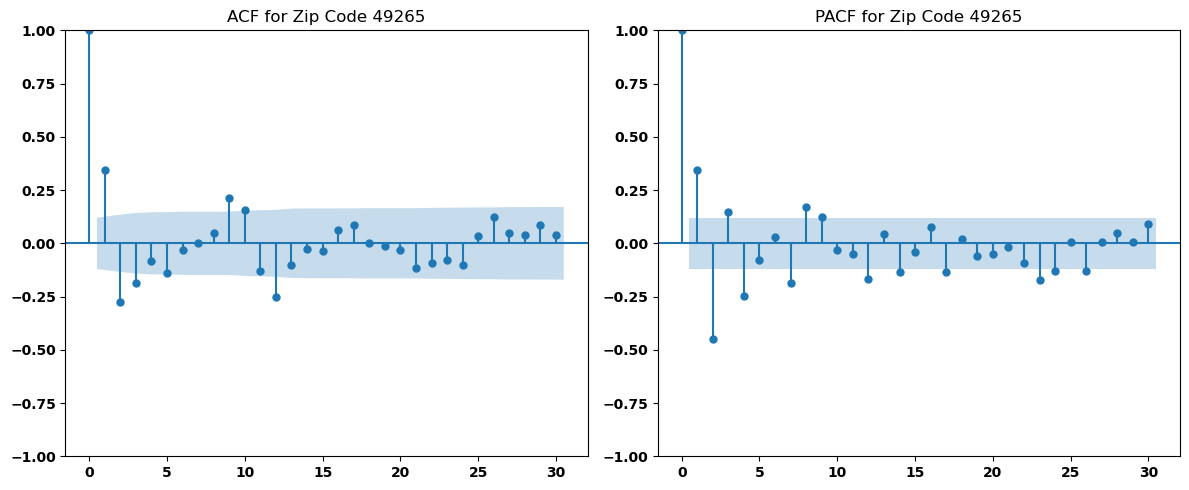

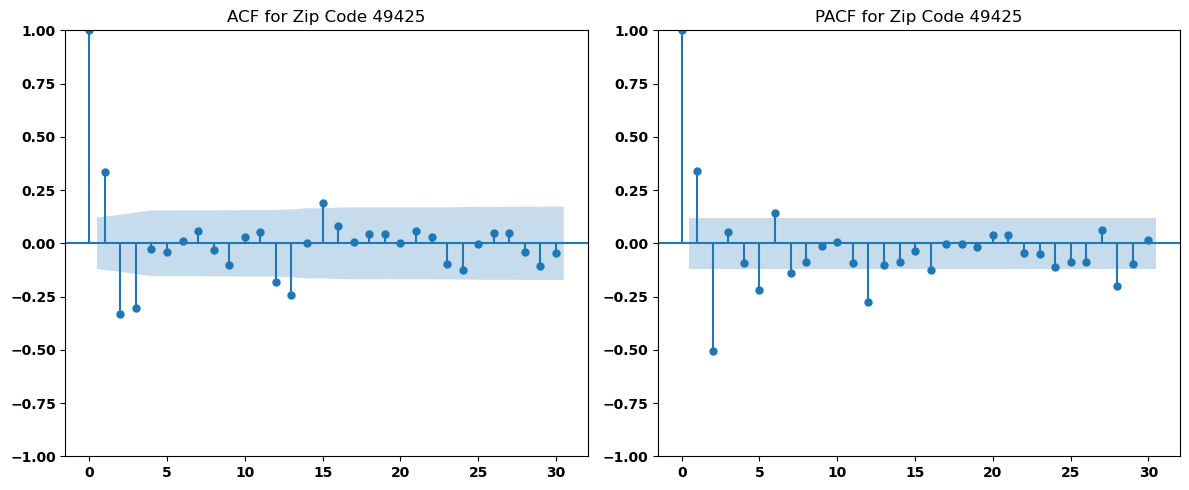

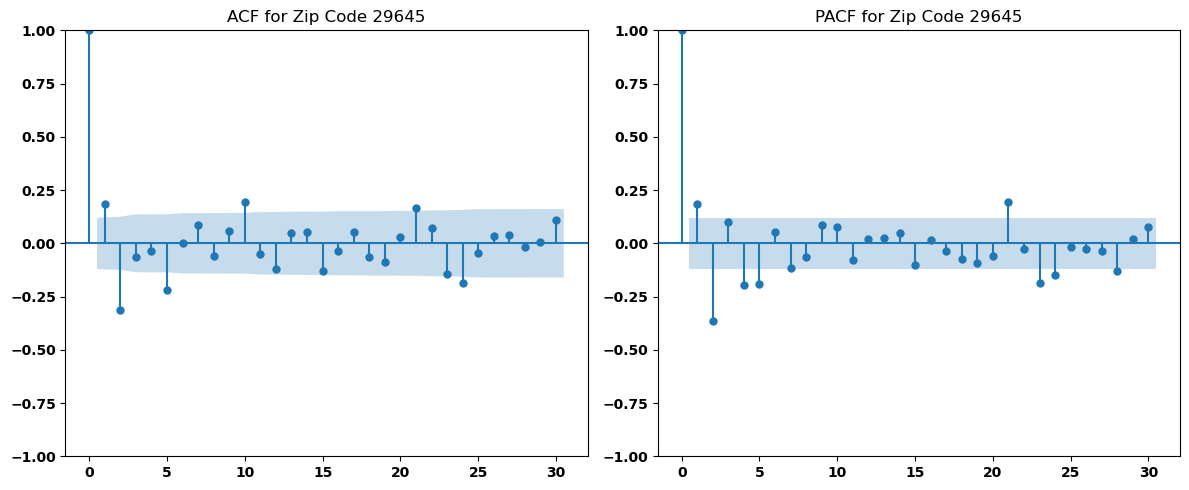

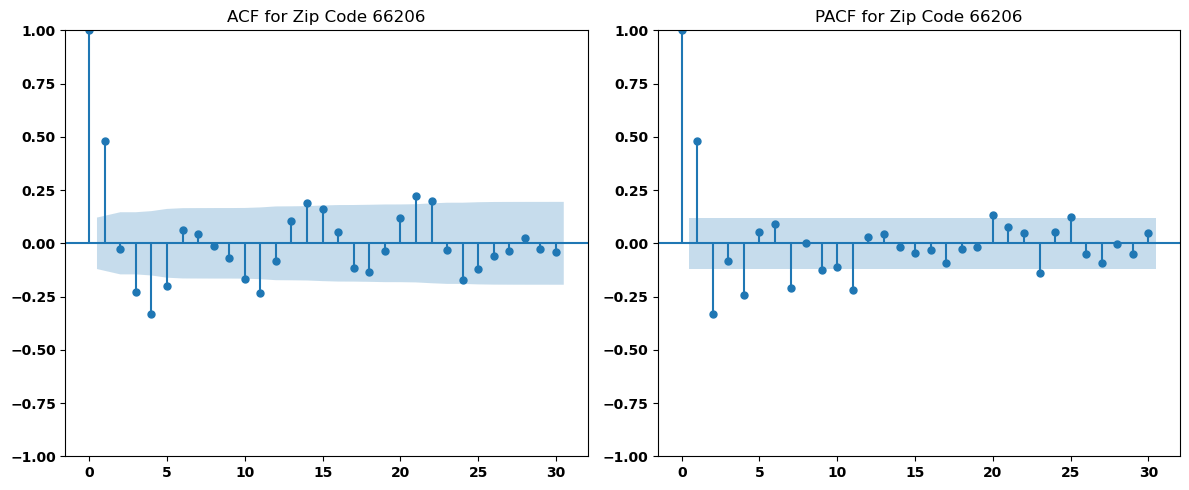

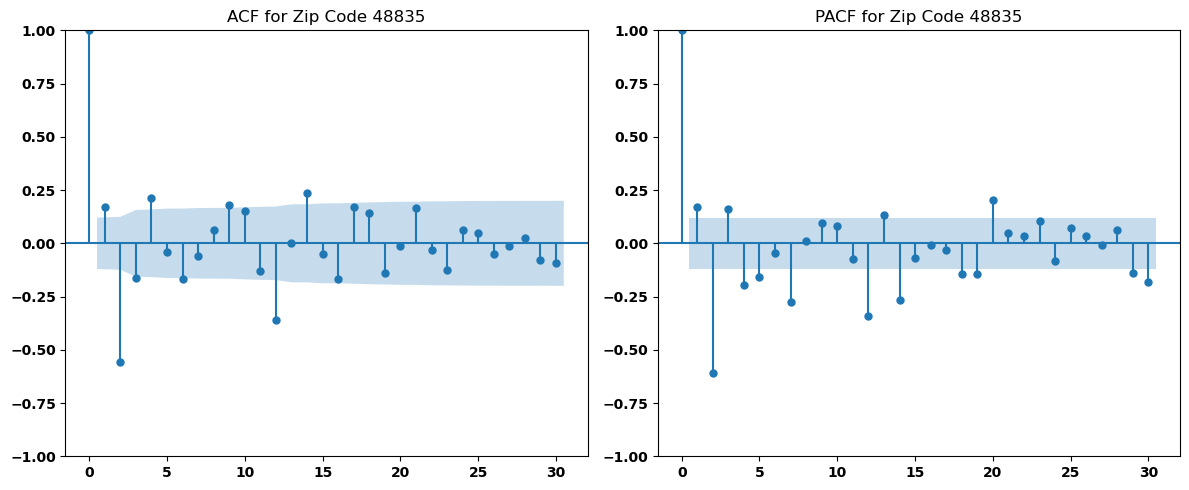

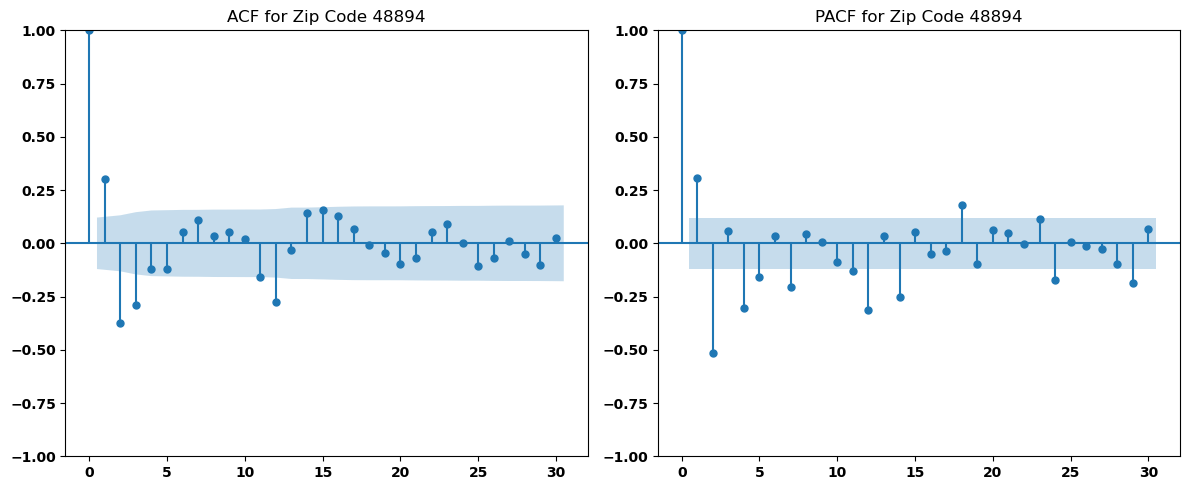

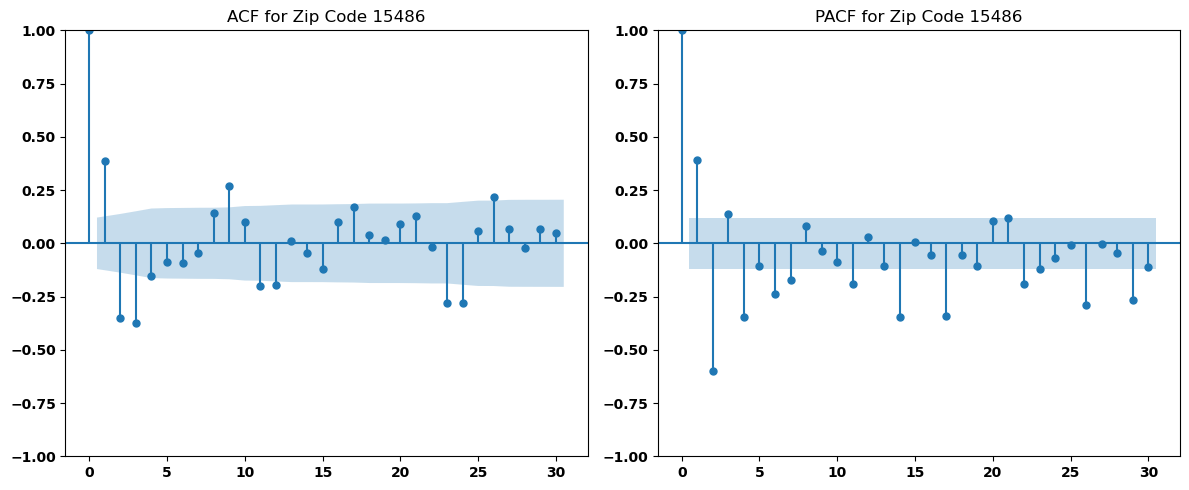

In [32]:
# Iterate over the dictionary of zipcode dataframes
for zipcode, zipcode_df in zipcode_dataframes.items():
    # Drop nulls
    zipcode_df.dropna(inplace=True)

    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plot_acf(zipcode_df['differenced_ret'], lags=30, ax=plt.gca())
    plt.title(f'ACF for Zip Code {zipcode}')

    plt.subplot(122)
    plot_pacf(zipcode_df['differenced_ret'], lags=30, ax=plt.gca())
    plt.title(f'PACF for Zip Code {zipcode}')

    plt.tight_layout()
    plt.show()


- Now we can begin the modeling process with the observations from our ACF and PACF graphs.

# **5.0 Modeling**

## **5.1 ARIMA modeling**

* The following will be the steps for our modelling:

1. Determine the ARIMA parameters (p,d,q) for each zipcode. This involves:
    * p: Lag order (lags of the autoregressive term).
    * d: Degree of differencing.
    * q: Order of moving average.
2. Fit the ARIMA model to the time series data for each zipcode.

3. Forecast future values and assess model performance.

In [33]:
# Define a function for ARIMA modeling

def build_arima_model(zipcode_df, column, value, order):
    # Split the data into train and test sets
    train_size = int(0.8 * len(zipcode_df))
    train, test = zipcode_df[:train_size], zipcode_df[train_size:]

    # Fit the ARIMA model
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()

    # Forecast
    forecast_steps = len(test)
    forecast_diff = model_fit.forecast(steps=forecast_steps)  # Forecast on the differenced scale

    # Calculate the accumulated forecasted values
    #forecast_accumulated = np.cumsum(forecast_diff)

    # Calculate the last observed value in the original time series
    #last_observed_value = zipcode_df['value'][-1]

    # Back-transform the forecasted values to the original scale
    #forecast_original = forecast_accumulated + last_observed_value



    # Back-transform the forecasted differenced series to obtain 'value' series
    forecast_original = forecast_diff.cumsum() + train[column].iloc[-1]

    # Create a time index for the forecasted values
    forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps, freq='M')

    # Calculate AIC value
    aic = model_fit.aic

    # Calculate RMSE
    #rmse = np.sqrt(mean_squared_error(test[column], forecast_original))

    # Calculate RMSE using the back-transformed forecasted 'value' series
    rmse = np.sqrt(mean_squared_error(test[column], forecast_original))

    print(f'ARIMA Parameters: p={order[0]}, d={order[1]}, q={order[2]}')
    print(f'RMSE: {rmse}')
    print(f'AIC: {aic}')

    # Plot the original data and the forecasted values in the original scale
    plt.figure(figsize=(10, 4))
    plt.plot(zipcode_df.index, zipcode_df['value'], label='Actual')
    plt.plot(forecast_index, forecast_original, label='Forecast', color='red')
    plt.legend()
    plt.title(f'ARIMA Forecast for Zip Code {zipcode_df["Zipcode"].iloc[0]}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

    return aic

ARIMA Parameters: p=3, d=0, q=10
RMSE: 789.6239424144345
AIC: 2748.9900589473245


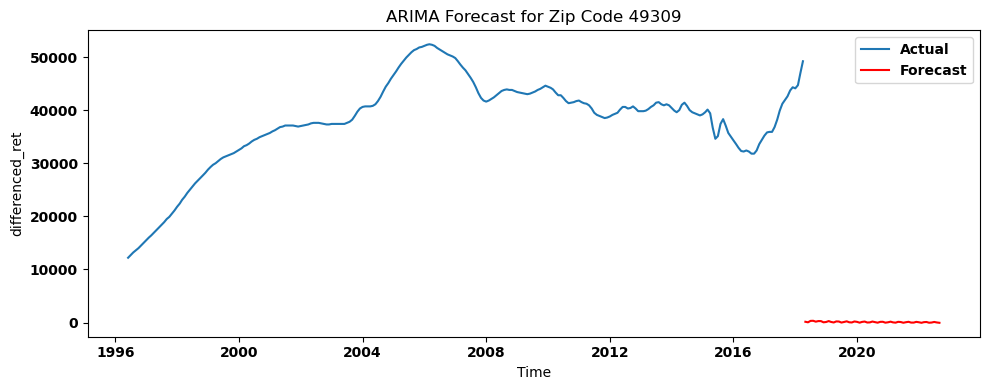

ARIMA Parameters: p=2, d=0, q=8
RMSE: 938.054278554561
AIC: 2929.970019163963


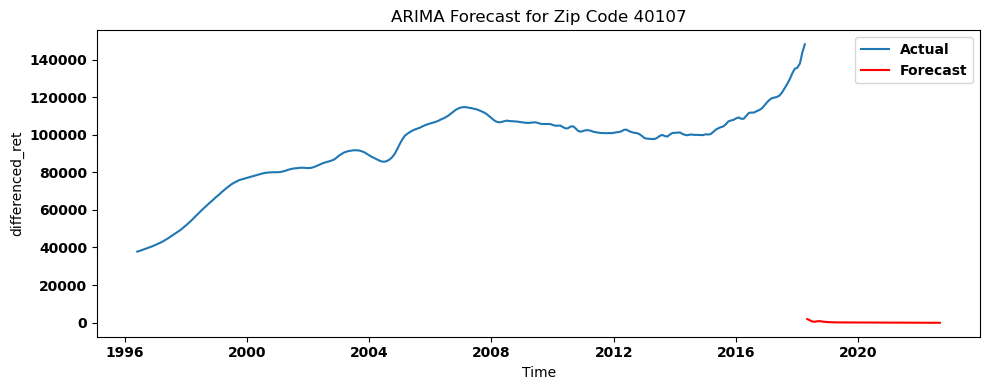

ARIMA Parameters: p=6, d=0, q=15
RMSE: 1827.085891717929
AIC: 3284.252109389773


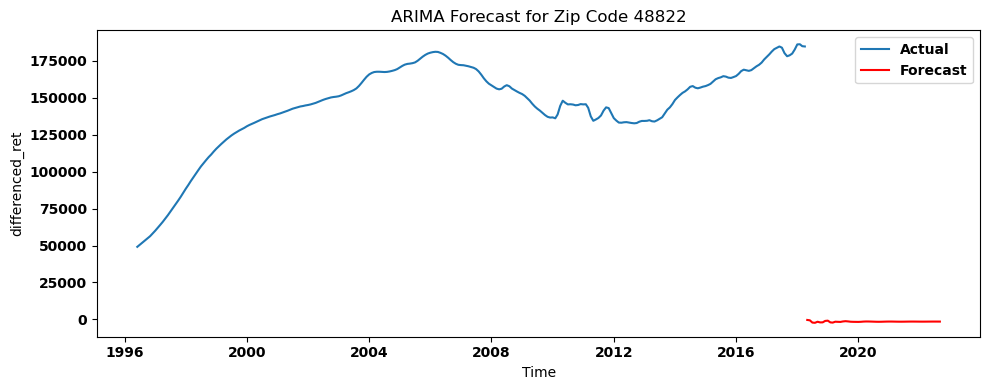

ARIMA Parameters: p=4, d=0, q=11
RMSE: 1055.4240962843235
AIC: 3059.226068942934


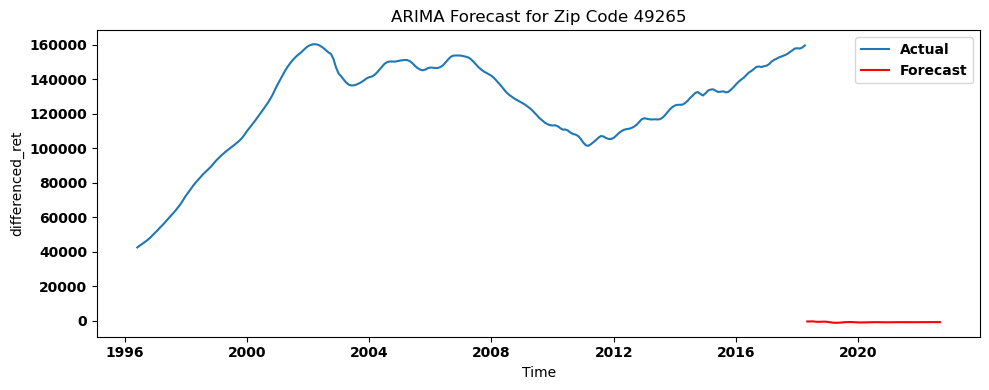

ARIMA Parameters: p=5, d=0, q=6
RMSE: 777.4607563420325
AIC: 3009.5376133401733


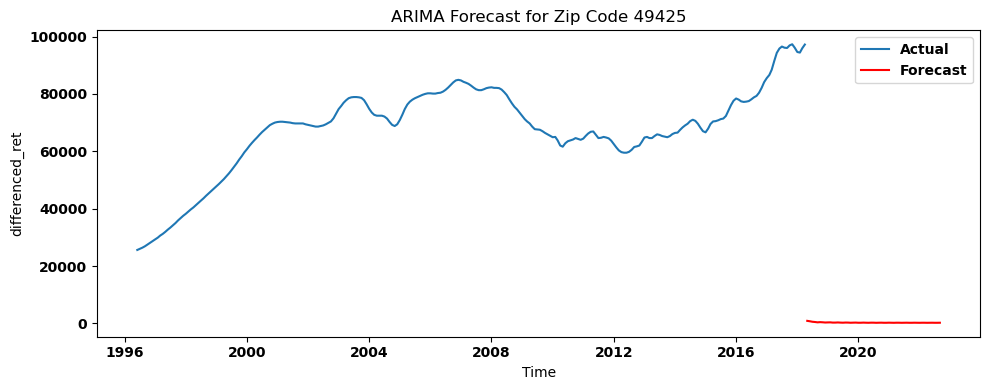

ARIMA Parameters: p=5, d=0, q=13
RMSE: 449.1315399642354
AIC: 2888.790188763988


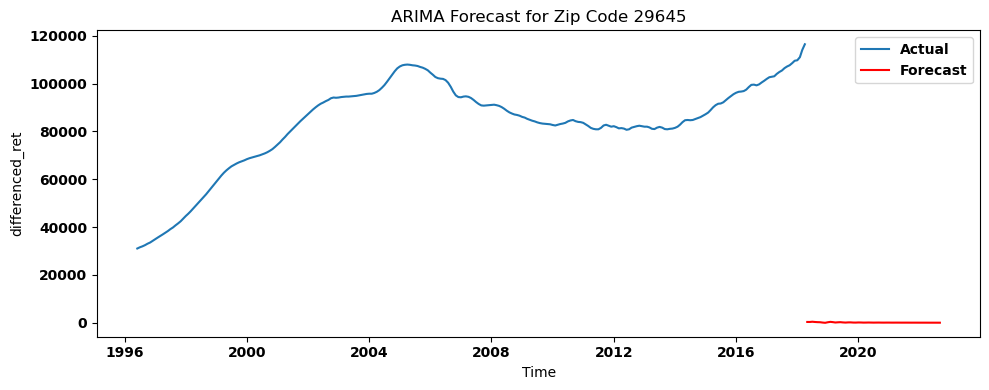

ARIMA Parameters: p=2, d=0, q=6
RMSE: 2735.374278613688
AIC: 3174.0769359973974


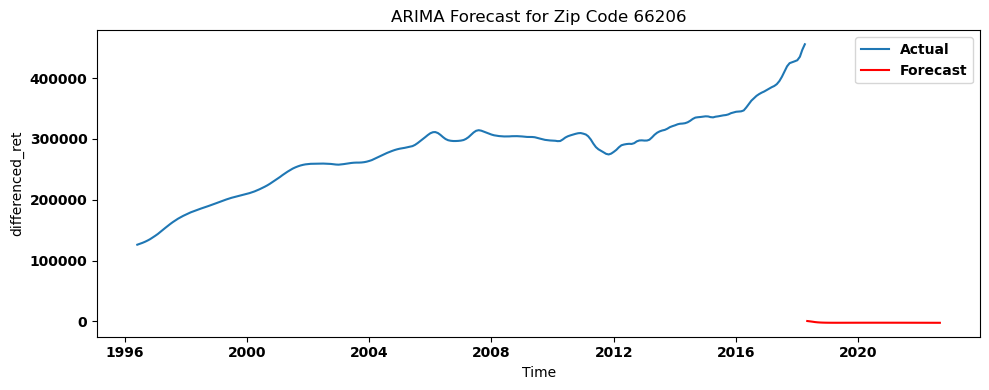

ARIMA Parameters: p=8, d=0, q=16
RMSE: 2198.4318646991896
AIC: 3203.8973057640997


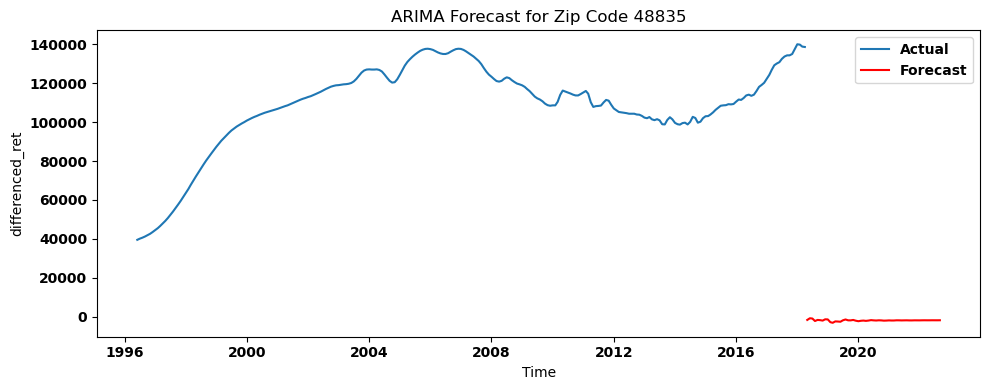

ARIMA Parameters: p=6, d=0, q=14
RMSE: 2543.656441072332
AIC: 3206.4174493440114


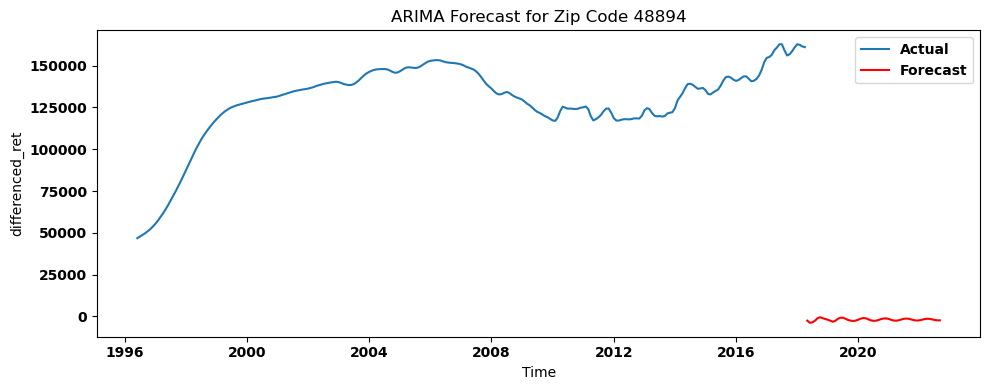

ARIMA Parameters: p=9, d=0, q=5
RMSE: 3222.0379292643297
AIC: 3081.594639938345


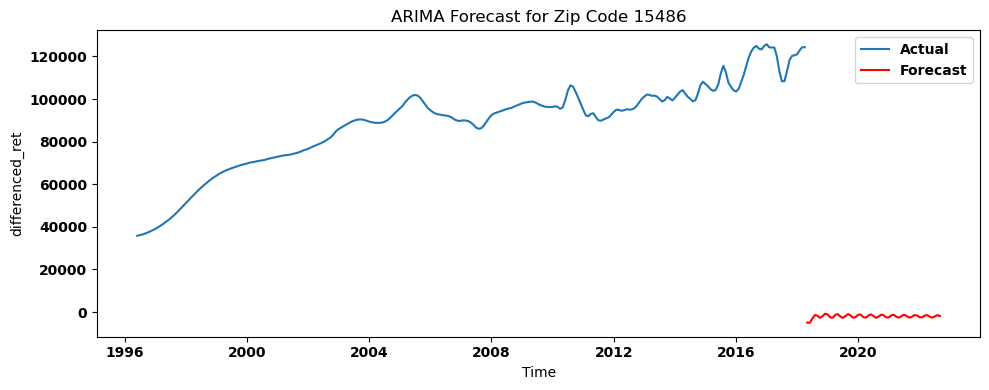

In [34]:
# Specify the ARIMA order for each zipcode
order_by_zipcode = {
    49309: (3, 0, 10),
    40107: (2, 0, 8),
    48822: (6, 0, 15),
    49265: (4, 0, 11),
    49425: (5, 0, 6),
    29645: (5, 0, 13),
    66206: (2, 0, 6),
    48835: (8, 0, 16),
    48894: (6, 0, 14),
    15486: (9, 0, 5)
}

# Iterate over the dictionary of zipcode dataframes and call the function
for zipcode, zipcode_df in zipcode_dataframes.items():
    if zipcode in order_by_zipcode:
        order = order_by_zipcode[zipcode]
        aic = build_arima_model(zipcode_df, 'differenced_ret', 'value', order)

- Since the data has seasonality, ARIMA model does not do well in making forecasts/predictions.

- Therefore, we will use `auto_arima` to perform hyperparameter tuning; this automates the process of selecting the best combination of hyperparameters (p, d, q) for an ARIMA model by searching over a range of values and selecting the configuration that minimizes a chosen metric, in our case, AIC.

### **Hyperparameter tuning with `auto_arima`**

In [ ]:
# Create a dictionary to store best ARIMA parameters for each zipcode
best_params_by_zipcode = {}

# Iterate over the dictionary of zipcode dataframes
for zipcode, zipcode_df in zipcode_dataframes.items():
    # Extract the time series column
    column = zipcode_df['ret']

    # Find the best ARIMA parameters using auto_arima
    stepwise_model = auto_arima(column, seasonal=True, m=12, trace=True)
    best_params = stepwise_model.get_params()['order'], stepwise_model.get_params()['seasonal_order']

    # Store the best parameters in the dictionary
    best_params_by_zipcode[zipcode] = best_params

    # Print the AIC value for the best model
    print(f"AIC for Zip Code {zipcode}: {stepwise_model.aic()}")

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=3664.736, Time=1.39 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=3858.601, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=3814.487, Time=0.20 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=3759.459, Time=0.25 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=3671.516, Time=0.67 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=3673.471, Time=0.54 sec
 ARIMA(2,2,2)(2,0,1)[12]             : AIC=3666.681, Time=2.71 sec
 ARIMA(2,2,2)(1,0,2)[12]             : AIC=3666.700, Time=2.52 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=3679.579, Time=0.25 sec
 ARIMA(2,2,2)(0,0,2)[12]             : AIC=3669.408, Time=1.54 sec
 ARIMA(2,2,2)(2,0,0)[12]             : AIC=3674.145, Time=1.17 sec
 ARIMA(2,2,2)(2,0,2)[12]             : AIC=3666.148, Time=3.36 sec
 ARIMA(1,2,2)(1,0,1)[12]             : AIC=3706.648, Time=1.07 sec
 ARIMA(2,2,1)(1,0,1)[12]             : AIC=3673.024, Time=1.32 sec
 ARIMA(3,2,2)(1,0,1

- Next we will perform seasonal decomposition to visually inspect the various components of our time series data such as the trend, seasonality and residuals.

### **Seasonal Decomposition**

In [ ]:
# Specify the frequency of seasonality(monthly data)
seasonality_frequency = 12

# Iterate over the dictionary of zipcode dataframes
for zipcode, zipcode_df in zipcode_dataframes.items():
    time_series = zipcode_df['differenced_ret']

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series, period=seasonality_frequency)

    # Plot the decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(time_series, label='Original')
    plt.legend(loc='upper left')
    plt.title(f'Original Time Series - Zip Code {zipcode}')

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.title(f'Trend Component - Zip Code {zipcode}')

    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.title(f'Seasonal Component - Zip Code {zipcode}')

    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.title(f'Residual Component - Zip Code {zipcode}')

    plt.tight_layout()
    plt.show()


- From our seasonal decomposition above, we can denote seasonality in all our zipcodes by viewing the `seasonal component` plots.
- Next up, using the best model parameters from our `auto_arima`, we will model our time series data using SARIMA which is more complex and advanced than ARIMA.
- SARIMA extends the capabilities of ARIMA by incorporating seasonal components of the time series data into the model.

In [ ]:
# Visualizing the split data
train_size = int(len(zipcode_df) * 0.8)
train, test = zipcode_df[:train_size], zipcode_df[train_size:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(zipcode_df.index, zipcode_df['differenced_ret'], label='Original Data', color='blue')
plt.plot(train.index, train['differenced_ret'], label='Train Set', color='green')
plt.plot(test.index, test['differenced_ret'], label='Test Set', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Train-Test Split of Time Series Data')
plt.legend()
plt.show()


## **5.2 SARIMA Modeling**

In [ ]:
# Create a dictionary of the best parameters from auto_arima
best_params_by_zipcode = {
    49309: ((4, 2, 1), (1, 0, 1, 12)),
    40107: ((3, 1 ,3), (1, 0, 1, 12)),
    48822: ((1, 2, 2), (1, 0, 1, 12)),
    49265: ((1, 2, 3), (0, 0, 2, 12)),
    49425: ((3, 2, 3), (0, 0, 2, 12)),
    29645: ((1, 2, 3), (1, 0, 1, 12)),
    66206: ((2, 1, 1), (0, 0, 0, 12)),
    48835: ((0, 2, 3), (2, 0, 1, 12)),
    48894: ((2, 2, 1), (0, 0, 1, 12)),
    15486: ((2, 1, 0), (2, 0, 0, 12))
}

In [ ]:
# Define a function for SARIMA modeling
def build_sarima_model(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), neighborhood=''):
    # Use the best parameters
    if ts['Zipcode'][0] in best_params_by_zipcode:
        order, seasonal_order = best_params_by_zipcode[ts['Zipcode'][0]]

    # SARIMA model
    model = SARIMAX(ts['value'],
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    # Fit the model and print results
    output = model.fit(disp=False)

    # Print output summary
    print(f"Summary for {neighborhood}:")
    print(output.summary())

    # Plot diagnostics
    output.plot_diagnostics(figsize=(15, 18))
    plt.suptitle(f"Diagnostics for {neighborhood}")
    plt.show()

    return output


# Define a function for one step forecasting
def ose_forecast_adjusted(ts, output, neighborhood=''):
    # Get predictions starting from 2017-04-01 and calculate confidence intervals
    pred = output.get_prediction(start=pd.to_datetime('2017-04-01'), dynamic=False)

    # Get the real and predicted values
    ts_forecasted = pred.predicted_mean
    ts_truth = ts['2017-04-01':]

    # Calculate RMSE
    mse = mean_squared_error(ts_truth, ts_forecasted)
    rmse = np.sqrt(mse)
    print(f'The RMSE of forecasts for {neighborhood} is {round(rmse, 2)}')

    # Confidence Intervals
    pred_conf = pred.conf_int()

    # Plot real vs predicted with confidence intervals
    plt.figure(figsize=(15, 6))
    plt.plot(ts['2016-04-01':], label='observed')
    plt.plot(ts_forecasted, label='one-step ahead forecast', alpha=0.5)
    plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='g', alpha=0.3)
    plt.title(f"{neighborhood} Forecast vs. Observed")
    plt.xlabel('Date')
    plt.ylabel('Median Home Value (USD)')
    plt.legend()
    plt.show()

    return {'rmse': rmse}


# Define a function for dynamic forecasting
def dynamic_forecast(ts, output, years=3, neighborhood=''):
    # Calculate steps
    steps = years * 12

    # Get forecast and confidence interval for steps ahead in the future
    future = output.get_forecast(steps=steps, dynamic=True, full_results=True)
    future_conf = future.conf_int()

    # Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Observed')
    plt.plot(future.predicted_mean, label='Dynamic Forecast', alpha=0.9)
    plt.fill_between(future_conf.index, future_conf.iloc[:, 0], future_conf.iloc[:, 1], color='k', alpha=0.25)
    plt.title(f"Dynamic {years}-Year Forecast for {neighborhood}")
    plt.xlabel('Date')
    plt.ylabel('Median Home Sale Value (USD)')
    plt.legend()
    plt.show()

    # Forecast prediction for n-years into the future
    forecast = future.predicted_mean[-1]
    maximum = future_conf.iloc[-1, 1]
    minimum = future_conf.iloc[-1, 0]

    # Create dictionary of predictions
    predictions = {
        'forecast': forecast.round(),
        'minimum': minimum.round(),
        'maximum': maximum.round()
    }

    return predictions

In [ ]:
# Iterate over the dictionary of zip code dataframes
for zipcode, zipcode_df in zipcode_dataframes.items():
    # Build SARIMA model
    order = (1, 1, 1)
    seasonal_order = (1, 1, 1, 12)
    output = build_sarima_model(zipcode_df, order, seasonal_order, neighborhood=f'Zip Code {zipcode}')

    # Perform dynamic forecast
    dynamic_forecast(zipcode_df['value'], output, years=3, neighborhood=f'Zip Code {zipcode}')

    # Perform OSE forecast adjusted
    ose_forecast_adjusted(zipcode_df['value'], output, neighborhood=f'Zip Code {zipcode}')

These graphs show the autoregressive terms, moving average terms, coefficients for the AR and MA terms and their statistical significance given their z-scores and p-values relative to 0.05. They also highlight the Ljung-Box test (Q statistic) for the residuals indicates that there might still be some autocorrelation left in the residuals, the Jarque-Bera test, and the Heteroskedasticity test.

### **Getting the top 5 best Zipcodes**

- Here we calculate the projections for each zip code.
    - We will treat the last data point of the time series as our Current Value.
    - Then the Projected Value will be the summation of the current value and the forecasted value.
    - Using the Current Value and the Projected Value, we will calculate the ROI for each zipcode.
    - We then sort the zipcodes by ROIs, and finally determine the top 5 best zipcodes.

In [ ]:
# A dictionary of the best parameters
best_params_by_zipcode = {
    49309: ((4, 2, 1), (1, 0, 1, 12)),
    40107: ((3, 1 ,3), (1, 0, 1, 12)),
    48822: ((1, 2, 2), (1, 0, 1, 12)),
    49265: ((1, 2, 3), (0, 0, 2, 12)),
    49425: ((3, 2, 3), (0, 0, 2, 12)),
    29645: ((1, 2, 3), (1, 0, 1, 12)),
    66206: ((2, 1, 1), (0, 0, 0, 12)),
    48835: ((0, 2, 3), (2, 0, 1, 12)),
    48894: ((2, 2, 1), (0, 0, 1, 12)),
    15486: ((2, 1, 0), (2, 0, 0, 12))
}

### **a) Forecasting**

In [ ]:
# Define a function for calculating projections

def calculate_projections(zipcode_df, zipcodes, years):

    # Define steps for forecasting
    steps = years * 12

    # Create list to append projection metrics
    projections = []

    # Iterate through each zip code
    for zipcode in zipcodes:

        # Get the specific dataframe for the current zipcode
        zip_ts = zipcode_df[zipcode_df['Zipcode'] == zipcode]

        if not zip_ts.empty:
            # Get the last value of the time series
            current_value = zip_ts['value'].iloc[-1]

            # Plug the optimal parameter values into a SARIMAX model
            order, seasonal_order = best_params_by_zipcode.get(zipcode, ((1, 0, 1), (1, 0, 1, 12)))

            SARIMAX = sm.tsa.statespace.SARIMAX(zip_ts['differenced_ret'],
                                                order=order,
                                                seasonal_order=seasonal_order,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

            # Fit the model
            output = SARIMAX.fit()

            # Get forecast and confidence interval for steps ahead in future
            forecast_steps = steps
            forecast = output.get_forecast(steps=forecast_steps)
            forecast_mean = forecast.predicted_mean
            conf_int = forecast.conf_int()

            # Calculate ROI based on the forecasted mean
            projected_value = current_value + forecast_mean.sum()
            roi = ((projected_value / current_value)- 1) * 100

            # Create dictionary to store projections
            projected_data = {
                'Zip Code': zipcode,
                'Investment Value ($)': current_value.round(2),
                'Predicted Sale Price ($)': projected_value.round(2),
                'Predicted ROI (%)': roi.round(2)
            }

            # Append to projections list
            projections.append(projected_data)

    # Return projections as a DataFrame
    return pd.DataFrame(projections)

#### **2-year forecast**

In [ ]:
# Call the function
zipcodes_to_project = [49309, 40107, 48822, 49265, 49425, 29645, 66206, 48835, 48894, 15486]
years_to_forecast = 2

# List to store the projected data for all zipcodes
all_projected_data = []

# Iterate over the dictionary of zipcode dataframes and call the function
for zipcode, zipcode_df in zipcode_dataframes.items():
    if zipcode in order_by_zipcode:
        order = order_by_zipcode[zipcode]
        projected_data = calculate_projections(zipcode_df, zipcodes_to_project, years_to_forecast)
        all_projected_data.append(projected_data)

# Concatenate all projected data into a single DataFrame
final_projected_data = pd.concat(all_projected_data, ignore_index=True)

final_projected_data.sort_values(by='Predicted ROI (%)', ascending=False)

In [ ]:
final_projected_data.sort_values(by='Predicted ROI (%)', ascending=False).head()

# **Conclusion / Interpreting Results**

From our analysis, the best Zipcodes to invest in based on a combination of predicted sale price and positive predicted ROI are:

* **Zip Code 48822:**

  * Investment Value: $184,700

  * Predicted Sale Price after 2 years: $197,993.26

  * Predicted ROI: 7.20%

* This Zipcode stands out with a promising ROI of 7.20%, indicating a potential return on investment. With an initial investment of $184,700, the projected sale price after 2 years suggests favorable growth potential. This could be attributed to positive market conditions and demand factors.

* **Zip Code 49309:**

  * Investment Value: $49,200

  * Predicted Sale Price after 2 years: $51,777.49

  * Predicted ROI: 5.24%

* Zip code 49309 offers a solid investment option with a predicted ROI of 5.24%. Despite its lower initial investment value, the projected sale price after 2 years indicates notable growth potential. This suggests a favorable investment opportunity considering the moderate risk

* **Zip Code 29645:**

  * Investment Value: $116,500

  * Predicted Sale Price after 2 years: $118,177.38

  * Predicted ROI: 1.44%

* Zip code 29645 presents a stable investment prospect with a predicted ROI of 1.44%. While the ROI is relatively modest, the expected increase in sale price after 2 years could provide steady returns, suitable for conservative investors seeking stable growth.

* **Zip Code 48835:**

  * Investment Value: $138,600

  * Predicted Sale Price after 2 years: $138,618.56

  * Predicted ROI: 0.01%

* Zip code 48835 offers a nearly negligible ROI of 0.01%. While the projected growth is minimal, the initial investment value of $138,600 remains relatively stable. This might attract risk-averse investors who prioritize stability over high returns.

* **Zip Code 49265:**

  * Investment Value: $159,600

  * Predicted Sale Price after 2 years: $158,830.09

  * Predicted ROI: -0.48%

* In contrast to the top 4 zipcodes, zip code 49265 displays a negative ROI of -0.48%, indicating a potential loss based on the projected sale price after 2 years. Investors might want to exercise caution with this zip code, as it suggests a declining property value trend.







# **Recommendations**

* Zipcodes 48822, 49309, 29645, and 48835 stand out as the top investment choices based on their projected ROIs and anticipated property value growth over the next 2 years. Considering these insights, we strongly advise Boma Yangu to consider these options for their investment prospects. These selections offer a compelling blend of attractive sale prices and favorable returns on investment, all while accounting for Boma Yangu's risk threshold.
* For zip code 49265, we strongly urge Boma Yangu to approach it with caution, as it signals the possibility of incurring a loss.

# **Next Steps**

1. Collect more data with added exogenous variables like economic indicators, interest rates and demographic data that could potentially influence the housing price values, then model them in a SARIMAX model. This could lead to better predictions and better models overall.


2. Build more complex and advanced models such as RNNs, e.g. LSTMs which make use of neural networks. These algorithms are more powerful than traditional time series. They are able to capture any complex patterns in our time series, hence leading to better forecasts/predictions.